<H1>Contrasting signatures of genomic divergence in rapidly speciating crater lake cichlid fishes</H1>

Andreas Kautt , Claudius Kratochwil , Alexander Nater , Gonzalo Machado-Schiaffino , Melisa Olave , Frederico Henning , Julian Torres-Dowdall , Andreas Härer , Christopher Hulsey , Paolo Franchini , Martin Pippel , Eugene Myers, Axel Meyer

R-Script for generation of main and extended figures
(Codes below were generated between 2017 and 2020 by Claudius Kratochwil — claudius.kratochwil@gmail.com, with contributions from Paolo Franchini [QTL])

Disclaimer: Although utmost care has been taken to ensure the correctness of this code, we provide this without warranty of any kind. Please contact us if you have questions and report any problems to the email address above.

<H2> 1. Loading packages and settings </H2>

In [1]:
setwd("/Users/claukrat/Dropbox/2013-2015_Konstanz/00_Manuscripts/In_Progress/M01_Mom_local/Nature_R1_New_Analyses/12_Dryad_upload/") #set to directory with data files
require(ggplot2,quietly = T)
require(cowplot,quietly = T)
require(stringr,quietly = T)
require(devtools,quietly = T)
require(reshape,quietly = T)
require(VennDiagram,quietly = T)
require(scatterplot3d,quietly = T)
require(qtl,quietly = T)
devtools::install_github('VPetukhov/ggrastr',dependencies = F)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘reshape’


The following object is masked from ‘package:cowplot’:

    stamp



Attaching package: ‘qtl’


The following object is masked from ‘package:reshape’:

    condense


Skipping install of 'ggrastr' from a github remote, the SHA1 (2e9a3a20) has not changed since last install.
  Use `force = TRUE` to force installation



<H2> 2. Load data main table </H2>
Loading csv table that contains all information about the WGS (whole genome resequencing samples) including color code and phenotype information.

In [2]:
midas.df <- read.csv(file = "sample_list.csv", header = TRUE, stringsAsFactors = F, sep = ",")

### Custom sorting of lakes, great lakes before crater lakes, otherwise alphabetically
midas.df$lake.sort <- factor(str_sub(midas.df$Group_short,1,3), levels=c("Man","Nic","Apo","Aye","AsM","AsL","Mas","Tsc","Xil"))
midas.df <- midas.df[order(midas.df$lake.sort),]

<b> Summary of the data by species and lake </b>

In [3]:
cbind(table(paste0(midas.df$Lake, " — ",midas.df$Species)))

[,1]
CL Apoyeque — Amphilophus cf. citrinellus 40  
CL Apoyo — Amphilophus astorquii          23  
CL Apoyo — Amphilophus chancho            16  
CL Apoyo — Amphilophus flaveolus          16  
CL Apoyo — Amphilophus globosus           25  
CL Apoyo — Amphilophus spp. (hybrid)       9  
CL Apoyo — Amphilophus supercilius        11  
CL Apoyo — Amphilophus zaliosus           20  
CL As. León — Amphilophus cf. citrinellus 20  
CL As. Managua — Amphilophus tolteca      20  
CL Masaya — Amphilophus cf. citrinellus   40  
CL Tiscapa — Amphilophus cf. citrinellus  20  
CL Xiloá — Amphilophus amarillo           21  
CL Xiloá — Amphilophus sagittae           27  
CL Xiloá — Amphilophus spp. (hybrid)      14  
CL Xiloá — Amphilophus viridis            17  
CL Xiloá — Amphilophus xiloaensis         16  
GL Managua — Amphilophus citrinellus      25  
GL Managua — Amphilophus labiatus         25  
GL Nicaragua — Amphilophus citrinellus    24  
GL Nicaragua — Amphilophus labiatus       24

<H2> 3. Figure 1d (Evolutionary relationships of all members of the Midas cichlid species complex – tSNE) </H2>
Dimensionality reduction (t-distributed stochastic neighbor embedding) of whole-genome genotype data reveals clustering by lake and described species (two species in GLs Nicaragua and Managua, six species in CL Apoyo, and four species in CL Xiloá). Representative specimens are shown for each species, lake population, and dark/gold as well as thin- or thick-lipped morphs. White circles represent individuals of mixed ancestry.
<BR> (Script for calculation of tSNEs can be found in <i> Kautt_Kratochwil_Nater_et_al__PLS regressions_and_morpho_tSNE.R.ipynb</i>.)

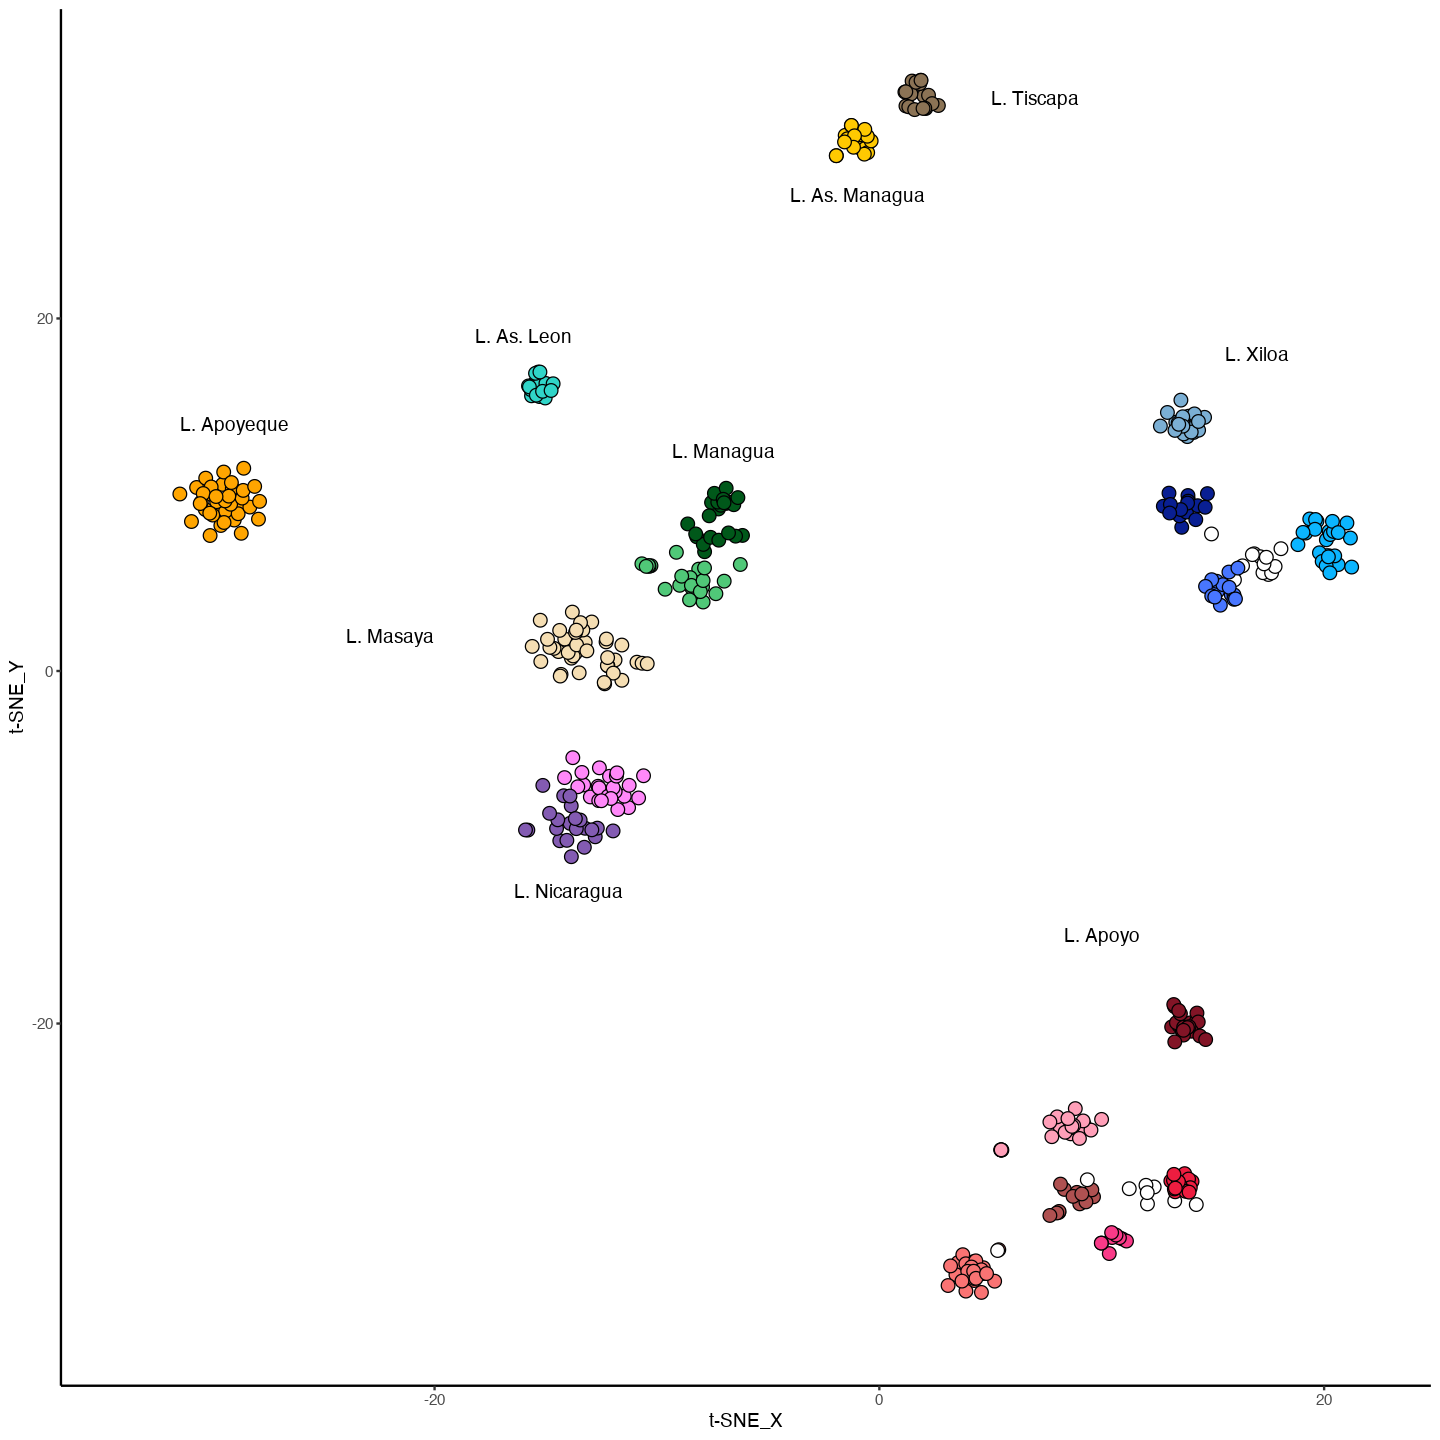

In [4]:
options(repr.plot.width=12, repr.plot.height=12)

### plotting the tSNE values and adding labels for lakes (species were added later on in Adobe Illustrator)
ggplot(midas.df, aes(x = tSNE_X, y = tSNE_Y)) +
    theme_classic() +
    geom_point(aes(fill = Group_short),shape=21,stroke=.4,size=3.3,fill=midas.df$Color_species) + #color code in samples.csv file is used
    scale_x_continuous(name = "t-SNE_X",limits = c(-34,22),breaks = c(-20,0,20)) +
    scale_y_continuous(name = "t-SNE_Y",limits = c(-37,34),breaks = c(-20,0,20)) + 
    annotate("text", x = -29, y=14, label = "L. Apoyeque") +
    annotate("text", x = 10, y=-15, label = "L. Apoyo")+
    annotate("text", x = -16, y=19, label = "L. As. Leon")+
    annotate("text", x = -1, y=27, label = "L. As. Managua")+
    annotate("text", x = 7, y=32.5, label = "L. Tiscapa")+
    annotate("text", x = 17, y=18, label = "L. Xiloa")+
    annotate("text", x = -22, y=2, label = "L. Masaya")+
    annotate("text", x = -7, y=12.5, label = "L. Managua")+
    annotate("text", x = -14, y=-12.5, label = "L. Nicaragua")

<H2> 4. Figure 2 (Major phenotypic axes and their relationship to population divergence.) </H2>
a–i, Variable importance in projection (VIP) scores from partial least squares (PLS) regressions of focal traits against theprimary axes of genomic divergence within GLs Nicaragua (a) and Managua (b) and CLs Masaya (c), Apoyo (d), Xiloá (e), Apoyeque (f), As. Managua (g), As. León (h) and Tiscapa. Trait VIP estimates for which the lower CI bounds exceed 1, and which are thus deemed important for genomic divergence, are highlighted with an arrowhead. Note that coloration was excluded in d, h, and i, as golden fish are virtually absent in these lakes (Extended Data Fig. 6f). Pharyngeal jaw data was only available for lakes with evident population structure (a–e) and CL Apoyeque (f).<BR> (Script for calculation of tSNEs can be found in <i> Kautt_Kratochwil_Nater_et_al__PLS regressions_and_morpho_tSNE.R.ipynb</i>.)

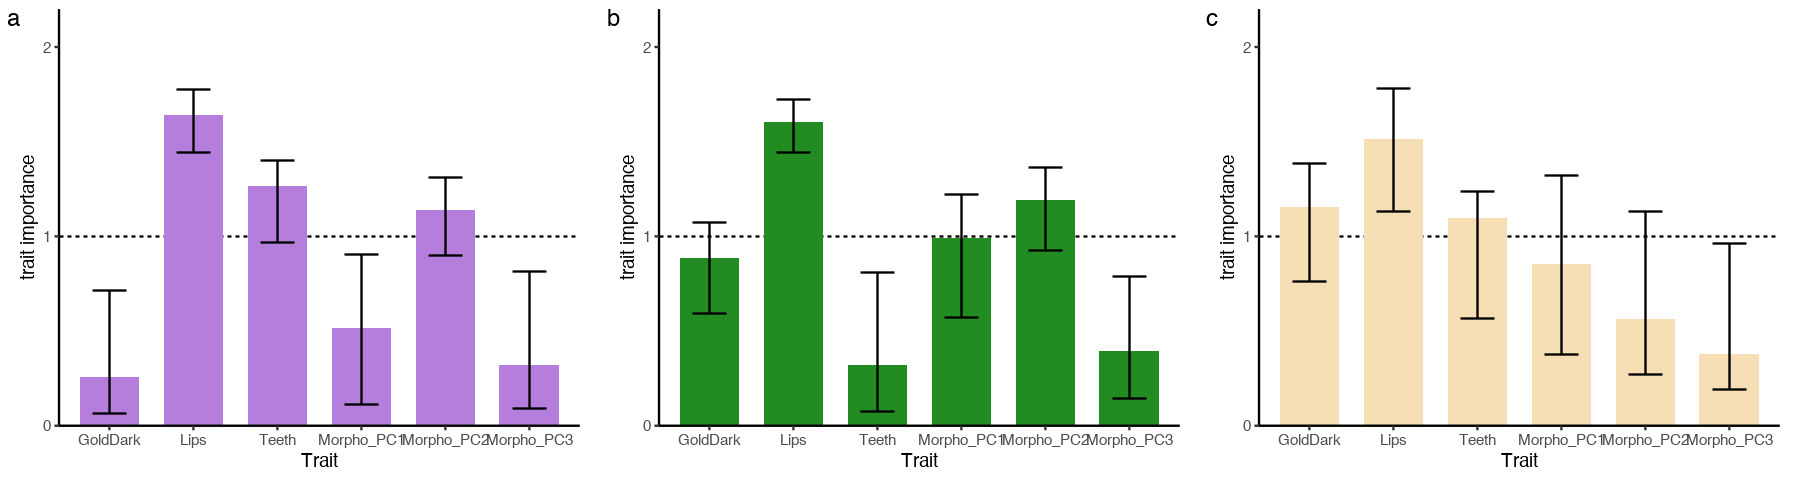

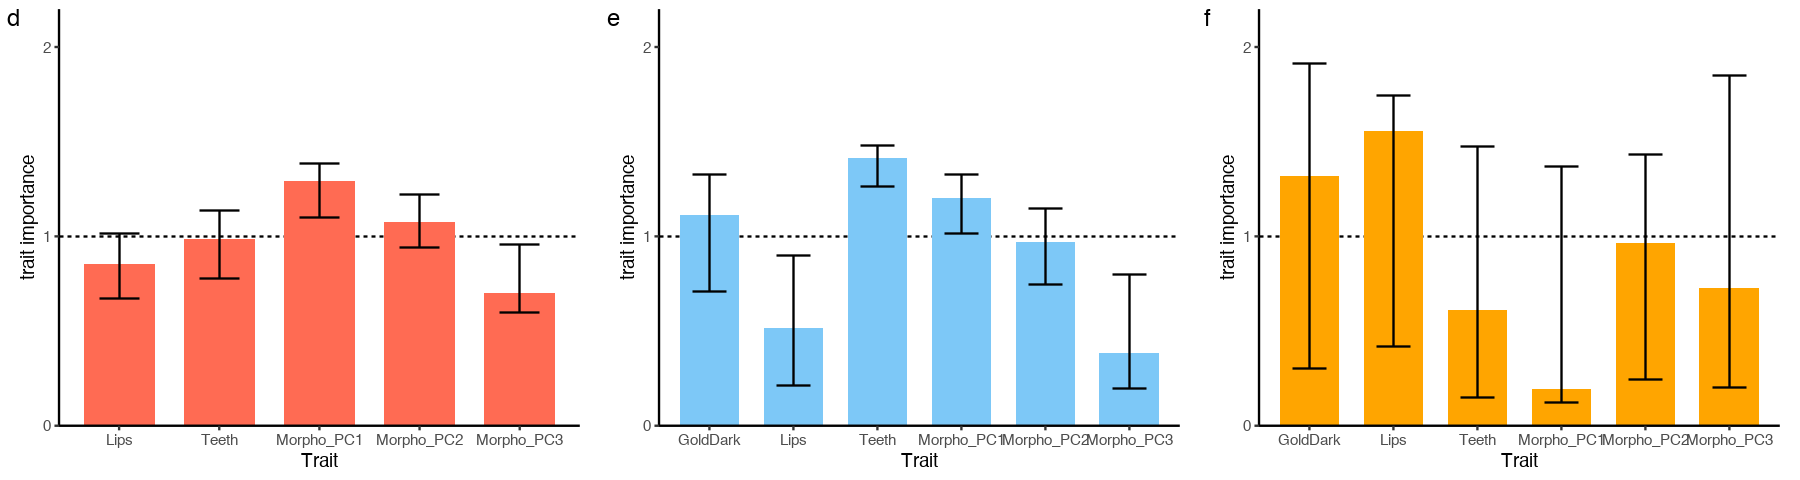

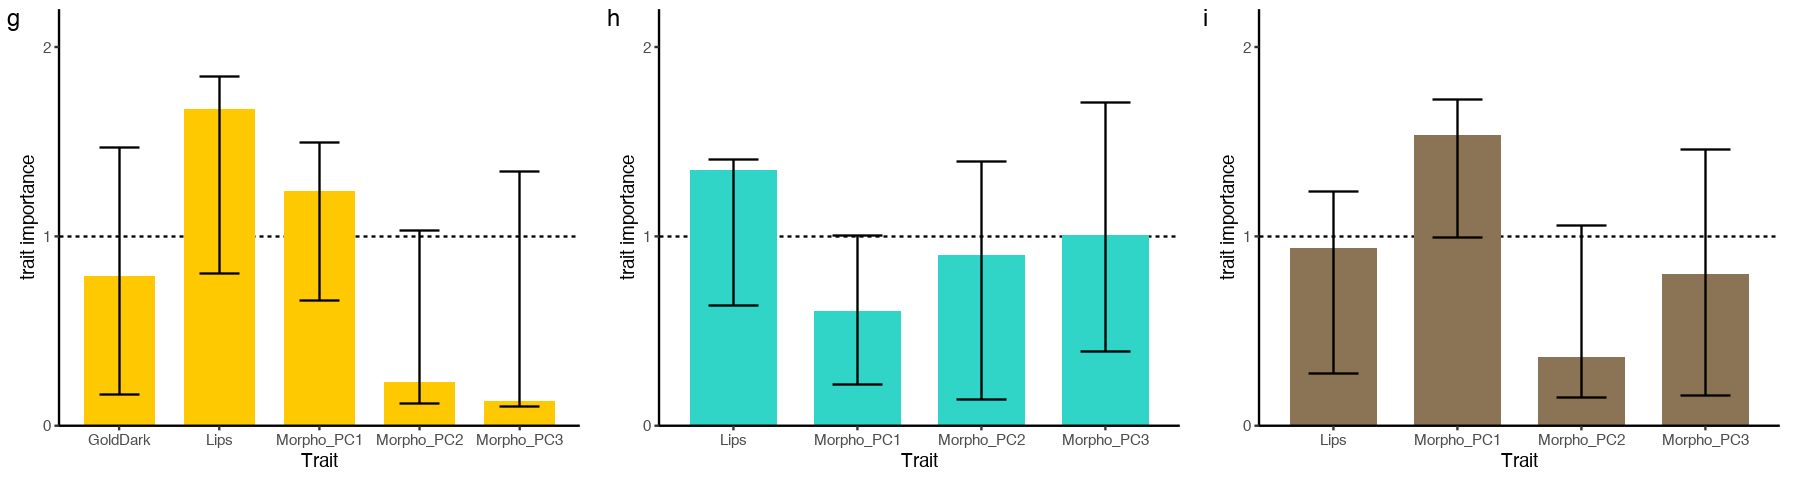

In [5]:
options(repr.plot.width=15, repr.plot.height=4)

pls<-read.csv("pls.csv", header = TRUE, stringsAsFactors = F, sep = ",") # load pls data
lakes<-c("GL Nicaragua", "GL Managua", "CL Masaya", "CL Apoyo", "CL Xiloá", "CL Apoyeque", "CL As. Managua", "CL As. León", "CL Tiscapa") # target lakes (in this case all)

P<-list() # make list to store plots

### loop through all lakes and plot barplots
for (lake in lakes) {

# traits as factors to allow custom sorting on x axis    
pls$Trait<-factor(pls$Trait,levels=c("GoldDark","Lips","Teeth","Morpho_PC1","Morpho_PC2","Morpho_PC3"))
traits<-unique(pls$Trait[pls$Lake==lake])
no<-length(traits)
    
pls.plot<-pls[pls$Lake==lake,] #restrict to lake (lake in lakes)
pls.plot$Trait<-factor(pls.plot$Trait,levels=levels(pls.plot$Trait)[levels(pls.plot$Trait) %in% pls.plot$Trait]) #remove missing traits
    
P[[lake]] <- ggplot(pls.plot, aes(x=Trait,y=VIP_estimate))+
     theme_classic() + theme(aspect.ratio = 4/5) + 
     geom_hline(yintercept=1, linetype="dashed", size=.5)+
     geom_bar(stat="identity", width=0.7, fill=midas.df$Color_lake[midas.df$Lake==lake][1])+
     scale_y_continuous(name="trait importance", expand=c(0,0),limits=c(0,2.2),breaks = c(0,1,2),labels = c(0,1,2))+
     geom_segment(aes(x = as.numeric(Trait), y = VIP_lower_bound_95CI, 
                     xend = as.numeric(Trait), yend = VIP_upper_bound_95CI))+ # add CIs
     geom_segment(aes(x = as.numeric(Trait)-.2, y = VIP_lower_bound_95CI, 
                     xend = as.numeric(Trait)+.2, yend = VIP_lower_bound_95CI))+ # add CIs
     geom_segment(aes(x = as.numeric(Trait)-.2, y = VIP_upper_bound_95CI, 
                     xend = as.numeric(Trait)+.2, yend = VIP_upper_bound_95CI)) # add CIs
   
}

### plot as grids (using cowplot)
plot_grid(P[[1]],P[[2]],P[[3]], ncol=3, labels = c("a","b","c"), align = "v")
plot_grid(P[[4]],P[[5]],P[[6]], ncol=3, labels = c("d","e","f"), align = "v")
plot_grid(P[[7]],P[[8]],P[[9]], ncol=3, labels = c("g","h","i"), align = "v")

<H2> 5. Figure 2 (Genome-wide association mapping() </H2>
a–d, Genome-wide association mapping for dark/gold coloration (a), lip size (b), pharyngeal jaw tooth size (c), and body shape (d). For coloration there is one peak on chr.11. For lips, we find two peaks on chr.8 and 24, respectively. In contrast, there are no clear signals of high association (-log10(P) > 10) in the case of pharyngeal jaws and body shape. The lack of signals is consistent with a polygenic bases for these traits as previously suggested based on laboratory crosses.

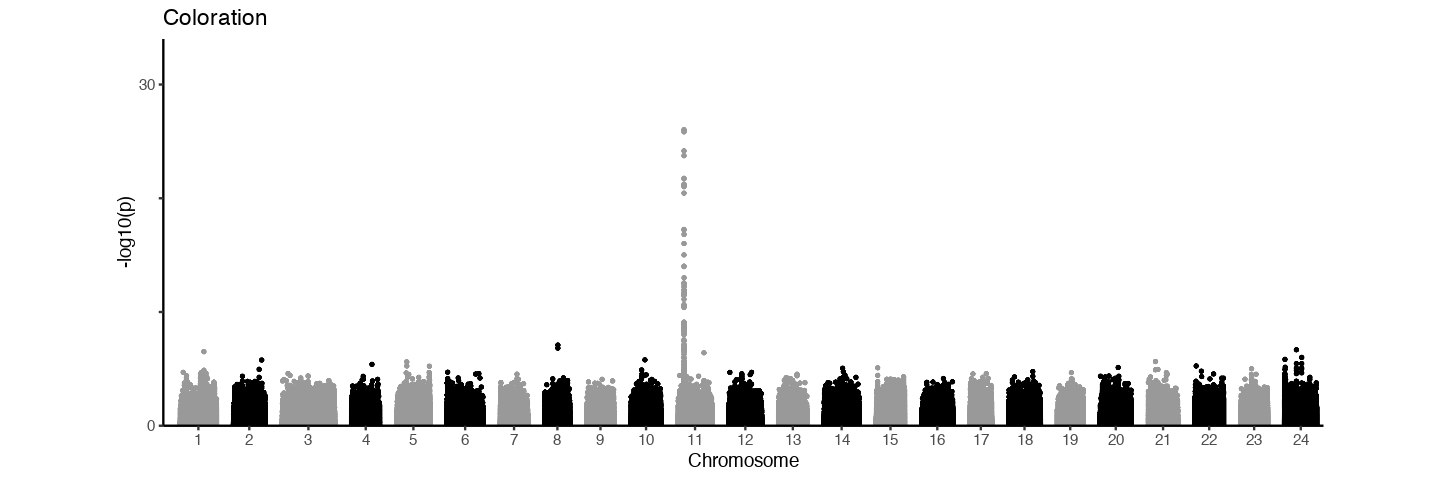

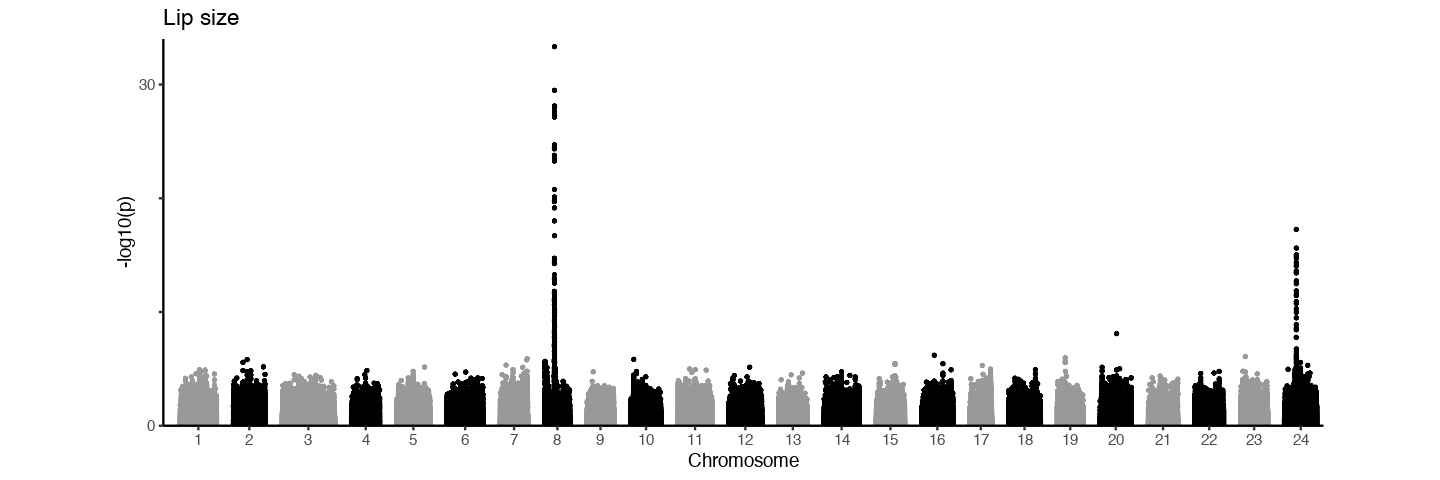

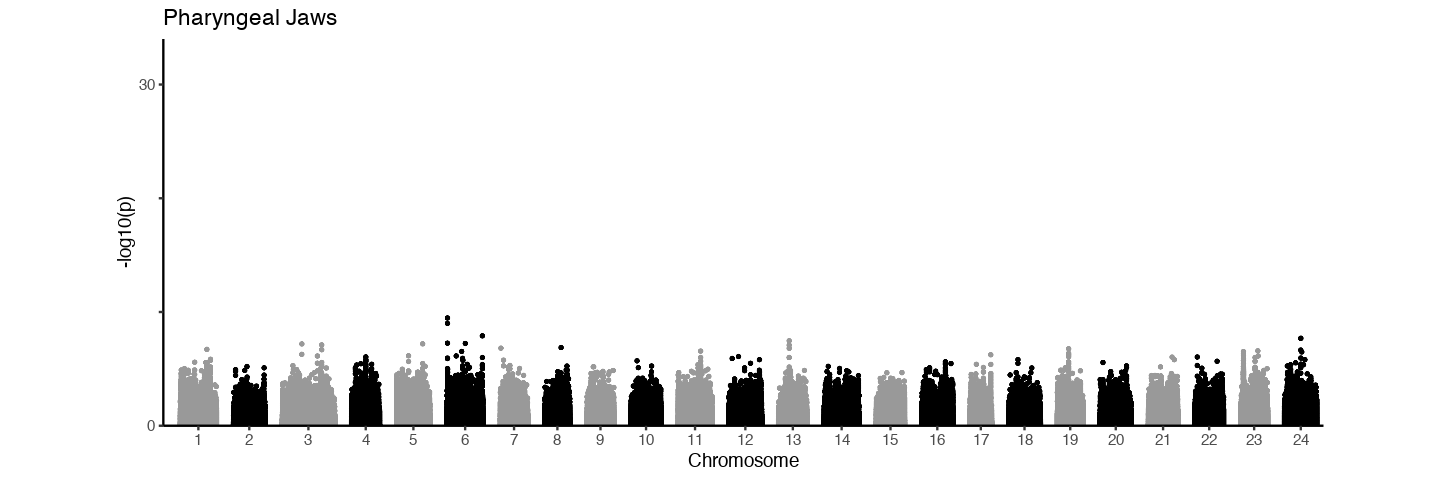

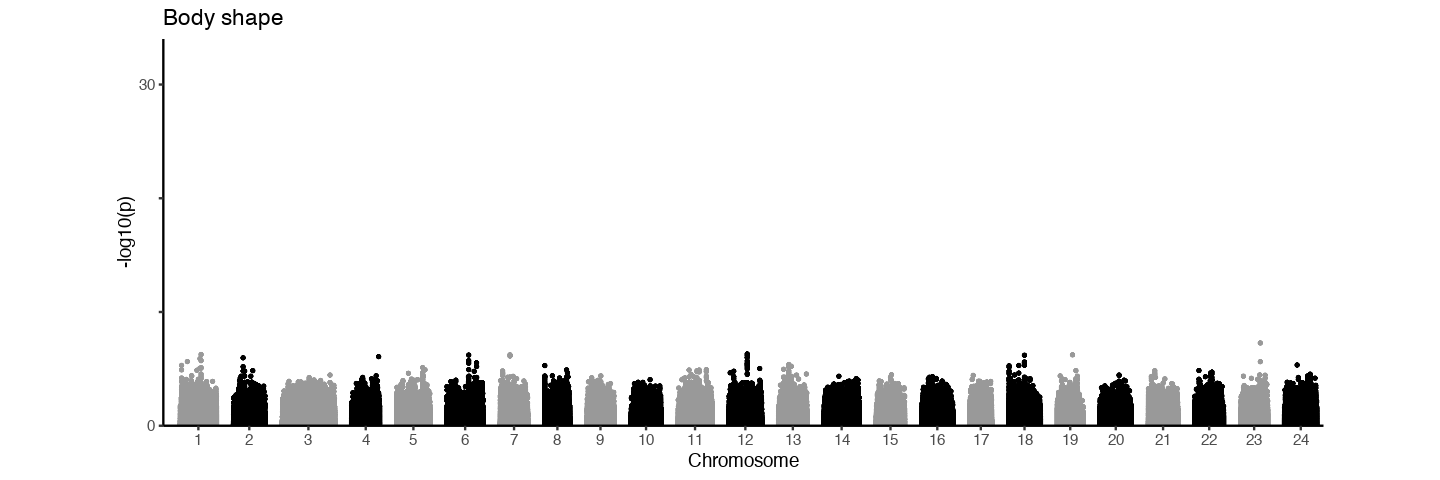

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

gwass<-c("gwas/gwas_all_gold_dark.ps","gwas/gwas_all_lipsize.ps","gwas/gwas_all_pharyngealjaws.ps","gwas/gwas_all_morphoPC1.ps")
color<-c("grey60","black")
y.max<-34
traits<-c("Coloration","Lip size","Pharyngeal Jaws","Body shape")

### Make continuous genome using chromosome sizes — a bit of an akward roundabout, the package qqman does the same thing better, but we needed some modifications for the fst plots (loess smoothening)
## define size of spacers between chromosomes
spacer<-1000000*20 
## add spacer to every chromosome
Genome <- c("1"=43087560+spacer+spacer,"2"=37655351+spacer,"3"=62521812+spacer,"4"=33436375+spacer,
            "5"=39570627+spacer,"6"=43153764+spacer,"7"=32809311+spacer,"8"=29956463+spacer,
            "9"=32221801+spacer,"10"=35827127+spacer,"11"=40343243+spacer,"12"=38942605+spacer,
            "13"=33684897+spacer,"14"=42035881+spacer,"15"=33808761+spacer,"16"=37174816+spacer,
            "17"=25990339+spacer,"18"=37624702+spacer,"19"=30829707+spacer,"20"=37146573+spacer,
            "21"=35038459+spacer,"22"=34332003+spacer,"23"=32234835+spacer,"24"=38324826+spacer)
## 'corrected' position of chromosome start
Genome2 <-c(spacer,sum(Genome[1]),sum(Genome[1:2]),sum(Genome[1:3]),sum(Genome[1:4]),
            sum(Genome[1:5]),sum(Genome[1:6]),sum(Genome[1:7]),sum(Genome[1:8]),
            sum(Genome[1:9]),sum(Genome[1:10]),sum(Genome[1:11]),sum(Genome[1:12]),
            sum(Genome[1:13]),sum(Genome[1:14]),sum(Genome[1:15]),sum(Genome[1:16]),
            sum(Genome[1:17]),sum(Genome[1:18]),sum(Genome[1:19]),sum(Genome[1:20]),
            sum(Genome[1:21]),sum(Genome[1:22]),sum(Genome[1:23]))
## centre of the chromosomes (will be used for placing the labels in the plot)
Genome3 <-c(0.5*Genome[1],Genome[1]+0.5*Genome[2]-0.5*spacer,-0.5*spacer+sum(Genome[1:2])+0.5*Genome[3],-0.5*spacer+sum(Genome[1:3])+0.5*Genome[4],
            -0.5*spacer+sum(Genome[1:4])+0.5*Genome[5],-0.5*spacer+sum(Genome[1:5])+0.5*Genome[6],-0.5*spacer+sum(Genome[1:6])+0.5*Genome[7],-0.5*spacer+sum(Genome[1:7])+0.5*Genome[8],
            -0.5*spacer+sum(Genome[1:8])+0.5*Genome[9],-0.5*spacer+sum(Genome[1:9])+0.5*Genome[10],-0.5*spacer+sum(Genome[1:10])+0.5*Genome[11],-0.5*spacer+sum(Genome[1:11])+0.5*Genome[12],
            -0.5*spacer+sum(Genome[1:12])+0.5*Genome[13],-0.5*spacer+sum(Genome[1:13])+0.5*Genome[14],-0.5*spacer+sum(Genome[1:14])+0.5*Genome[15],-0.5*spacer+sum(Genome[1:15])+0.5*Genome[16],
            -0.5*spacer+sum(Genome[1:16])+0.5*Genome[17],-0.5*spacer+sum(Genome[1:17])+0.5*Genome[18],-0.5*spacer+sum(Genome[1:18])+0.5*Genome[19],-0.5*spacer+sum(Genome[1:19])+0.5*Genome[20],
            -0.5*spacer+sum(Genome[1:20])+0.5*Genome[21],-0.5*spacer+sum(Genome[1:21])+0.5*Genome[22],-0.5*spacer+sum(Genome[1:22])+0.5*Genome[23],-0.5*spacer+sum(Genome[1:23])+0.5*Genome[24])/1000000
## corrected position of spacers
spacers<-((Genome2[-1]-spacer/2)/1000000)
## final size of henome including spacers
limit<-(Genome2[23]+Genome[24]+2*spacer)/1000000

# load all gwas data one by one and plot results
for (gwas in gwass) {

    gwasResults <-data.frame(read.csv(gwas,sep="\t", header=F),stringsAsFactors = F)[,c(1,2,4)]
    colnames(gwasResults)<-c("CHR","BP","P")
    
    ##create 'continuous genome' including the spacer defined above and add position values from gwas data frame
    gwasResults$ContBP<-c() 
    for (k in 1:24) {
        gwasResults$ContBP[gwasResults$CHR==k] <- Genome2[k]
    }
    gwasResults$BP <- (gwasResults$ContBP+gwasResults$BP)/1000000
    gwasResults$pLog10<- -log10(gwasResults$P) #calculate -log10(pvalue)
    
    title<-traits[which(gwas == gwass)[[1]]] #extract name of the trait to plot it as title
    
    P <-ggplot(data = gwasResults) + 
          theme_classic() + 
          theme(aspect.ratio = 1/3) + #change aspect ratio
          expand_limits(x = 0, y = 0) + 
          theme(legend.position="none") +
          ggtitle(label = title) +
          ggrastr::geom_point_rast(aes(x = BP, y = pLog10,col=as.factor(CHR)), pch=16, cex=1.5,na.rm=T,raster.width = 12,raster.height = 4) + #geom_rast_point rasters the image to avoid memory problems
          scale_x_continuous(name ="Chromosome", breaks = Genome3,labels = 1:24,expand=c(0,0),limits=c(0,limit)) + #limit and breaks have been calculated before
          scale_y_continuous(name="-log10(p)",limits = c(0,y.max),expand=c(0,0),breaks=c(0,10,20,30),labels = c(0,"","",30)) +
          scale_color_manual(values = rep(color,12))
    
    print(P)
    
   }

<H2> 6a. QTL analysis Morpho PC1 </H2>


In [7]:
options(repr.plot.width=16, repr.plot.height=4)
options(warn=-1) # do not show warnings (i.e. because of missing phenotypes)

#load data file and create a "cross" data file
qtl <-read.cross("csv", file="qtl_data_morpho.csv", na.string=c("-"), genotypes=c("a","h","b"),sep=",", crosstype="f2")

#call jittermap function: slightly separate markers with same position 
qtl <-jittermap(qtl, amount=1e-6)

#calculate genotype probability
qtl <- calc.genoprob(qtl, step=0.5,error.prob=.00001,map.function="kosambi")

 --Read the following data:
	 279  individuals
	 594  markers
	 2  phenotypes
 --Cross type: f2 


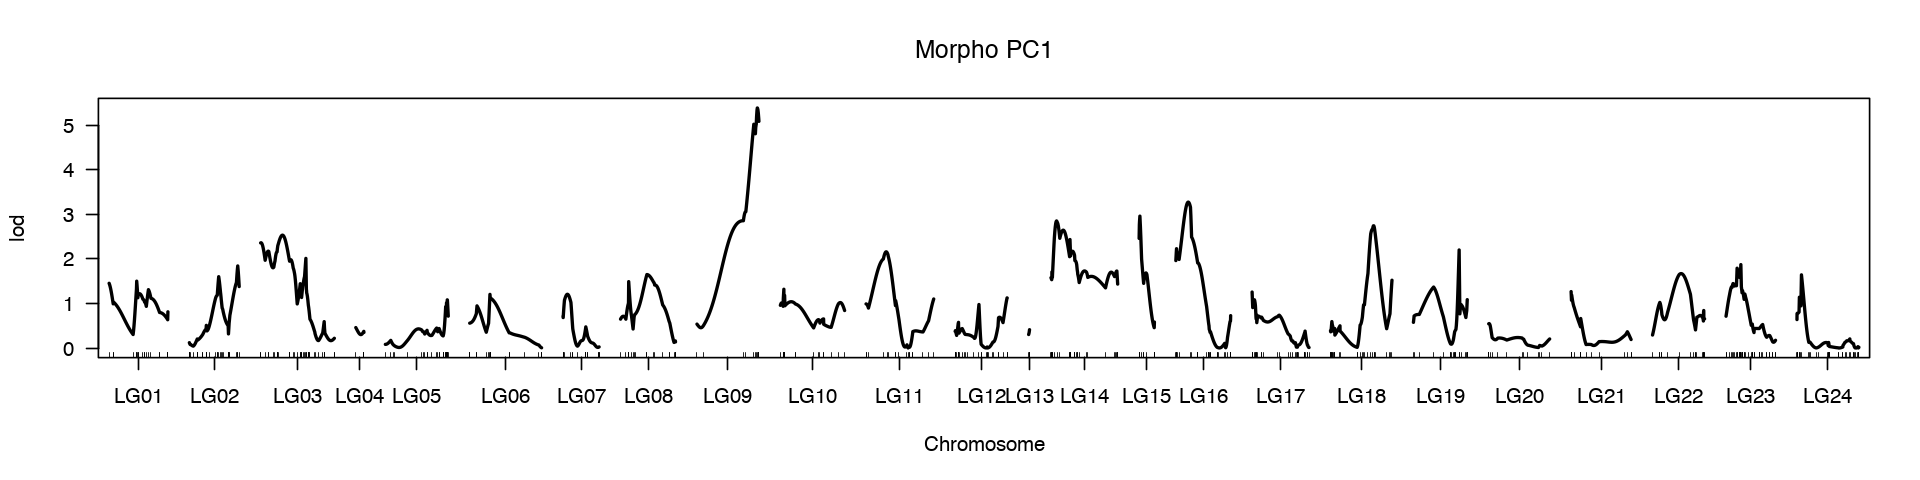

In [8]:
#QTL mapping using Haley-Knott regression
qtl.hk.morpho <-scanone(qtl,pheno.col=1,method="hk")
plot(qtl.hk.morpho, main="Morpho PC1")

In [9]:
# do permutations to calculate suggestive chromosome-level thresholds (p=0.1) for all chromosomes
# and output "TRUE" for significant QTL detected at "x" chromosome
LG_names <- names(qtl$geno)
qtl_HK_chromosome_perm_all <- lapply(LG_names, function(x)
  scanone(qtl,pheno.col=1,method="hk", chr=x, n.perm=10000))
                                       
qtl_HK_chromosome_thresh_all <- lapply(qtl_HK_chromosome_perm_all, function(X)
  summary(X, alpha=0.1)[[1]])
                                         
names(qtl_HK_chromosome_thresh_all) <- LG_names
                                              
# Chromosome threshold for each chromosome
qtl.hk<-scanone(qtl,pheno.col=1,method="hk")
qtl_lod_split=split(qtl.hk, f=qtl.hk$chr)
LOD_higher_than_threshold=unlist(lapply(LG_names, function(x)
  max(qtl_lod_split[[x]][,"lod"])>=qtl_HK_chromosome_thresh_all[[x]]
))
names(LOD_higher_than_threshold) <- LG_names
                                       
chromosomes <- names(LOD_higher_than_threshold[LOD_higher_than_threshold==T])

Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...


In [10]:
#Fit 8 QTL model
makeqtl <- makeqtl(qtl, chr=chromosomes, 
                         pos=c(as.numeric(max(qtl.hk, chr=chromosomes[1])[2]), 
                               as.numeric(max(qtl.hk, chr=chromosomes[2])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes[3])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes[4])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes[5])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes[6])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes[7])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes[8])[2])), 
                         what="prob")

out.fq <- fitqtl(qtl, qtl=makeqtl, method="hk")

#make a summary of the model
summary(out.fq)

#drop non-significant QTL on LG11
chromosomes.red<-chromosomes[-3]

#Fit 7 QTL model
makeqtl <- makeqtl(qtl, chr=chromosomes.red, 
                         pos=c(as.numeric(max(qtl.hk, chr=chromosomes.red[1])[2]), 
                               as.numeric(max(qtl.hk, chr=chromosomes.red[2])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes.red[3])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes.red[4])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes.red[5])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes.red[6])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes.red[7])[2])), 
                         what="prob")

out.fq <- fitqtl(qtl, qtl=makeqtl, method="hk")

#make a summary of the model
summary<-summary(out.fq)
summary


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 278 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 

       df          SS          MS      LOD     %var Pvalue(Chi2)    Pvalue(F)
Model  16 0.006448831 4.03052e-04 22.21345 30.78647 1.287859e-14 6.550316e-14
Error 261 0.014498132 5.55484e-05                                            
Total 277 0.020946963                                                        


Drop one QTL at a time ANOVA table: 
----------------------------------  
          df Type III SS   LOD   %var F value Pvalue(Chi2) Pvalue(F)    
LG03@25.5  2   0.0003800 1.562 1.8141   3.420        0.027  0.034173 *  
LG09@70.3  2   0.0012741 5.085 6.0826  11.469        0.000  1.68e-05 ***
LG11@23.5  2   0.0002022 0.836 0.9652   1.820        0.146  0.164098    
LG14@6.5   2   0.0009174 3.704 4.3795   8.257        0.000  0.000333 ***
LG15@0.9   2   0.0005748 2


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 278 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 

       df         SS           MS      LOD     %var Pvalue(Chi2)    Pvalue(F)
Model  14 0.00624665 4.461893e-04 21.37743 29.82127 9.436896e-15 3.941292e-14
Error 263 0.01470031 5.589473e-05                                            
Total 277 0.02094696                                                         


Drop one QTL at a time ANOVA table: 
----------------------------------  
          df Type III SS   LOD  %var F value Pvalue(Chi2) Pvalue(F)    
LG03@25.5  2   0.0004738 1.915 2.262   4.239        0.012  0.015423 *  
LG09@70.3  2   0.0013941 5.469 6.655  12.470        0.000   6.7e-06 ***
LG14@6.5   2   0.0009089 3.622 4.339   8.130        0.000  0.000375 ***
LG15@0.9   2   0.0006174 2.484 2.948   5.523        0.003  0.004470 ** 
LG16@14.5  2   0.0009795 3.894 4.676

In [11]:
# print number of significant QTL and VEP
print(paste0(length(chromosomes.red)," significant QTLs for Pharyngeal Jaws explaining ", round(summary[[1]][1,5],1), "% of the variance on: ",paste(chromosomes,collapse=", ")))

[1] "7 significant QTLs for Pharyngeal Jaws explaining 29.8% of the variance on: LG03, LG09, LG11, LG14, LG15, LG16, LG18, LG19"


<H2> 6b. QTL analysis Pharyngeal Jaws </H2>

In [12]:
options(repr.plot.width=16, repr.plot.height=4)

#load data file and create a "cross" data file
qtl <-read.cross("csv", file="qtl_data_jaws.csv", na.string=c("-"), genotypes=c("a","h","b"),sep=",", crosstype="f2")

#call jittermap function: slightly separate markers with same position 
qtl <-jittermap(qtl, amount=1e-6)

#calculate genotype probability
qtl <- calc.genoprob(qtl, step=0.5,error.prob=.00001,map.function="kosambi")

 --Read the following data:
	 279  individuals
	 594  markers
	 2  phenotypes
 --Cross type: f2 


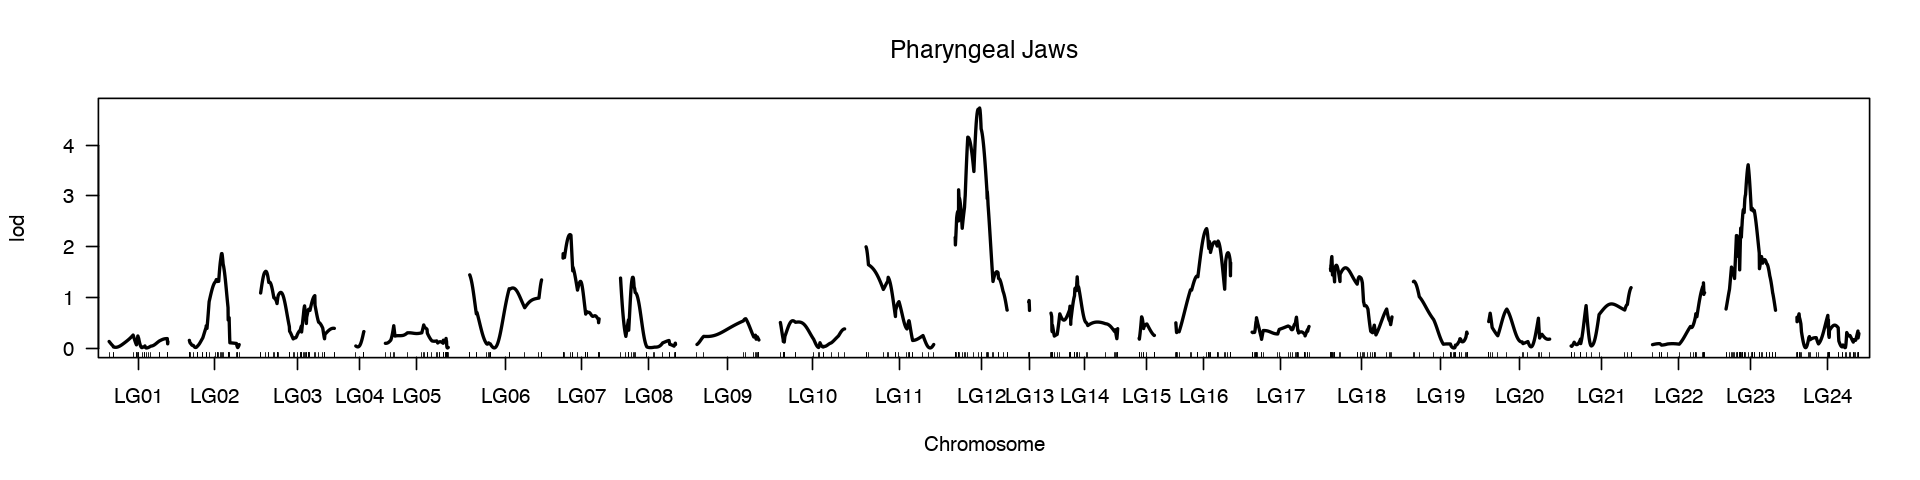

In [13]:
#QTL mapping using Haley-Knott regression
qtl.hk.morpho <-scanone(qtl,pheno.col=1,method="hk")
plot(qtl.hk.morpho, main="Pharyngeal Jaws")

In [14]:
# do permutations to calculate suggestive chromosome-level thresholds (p=0.1) for all chromosomes
# and output "TRUE" for significant QTL detected at "x" chromosome
LG_names <- names(qtl$geno)
qtl_HK_chromosome_perm_all <- lapply(LG_names, function(x)
  scanone(qtl,pheno.col=1,method="hk", chr=x, n.perm=10000))
                                       
qtl_HK_chromosome_thresh_all <- lapply(qtl_HK_chromosome_perm_all, function(X)
  summary(X, alpha=0.1)[[1]])
                                         
names(qtl_HK_chromosome_thresh_all) <- LG_names
                                              
# Chromosome threshold for each chromosome
qtl.hk<-scanone(qtl,pheno.col=1,method="hk")
qtl_lod_split=split(qtl.hk, f=qtl.hk$chr)
LOD_higher_than_threshold=unlist(lapply(LG_names, function(x)
  max(qtl_lod_split[[x]][,"lod"])>=qtl_HK_chromosome_thresh_all[[x]]
))
names(LOD_higher_than_threshold) <- LG_names
                                       
chromosomes <- names(LOD_higher_than_threshold[LOD_higher_than_threshold==T])

Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...
Doing permutation in batch mode ...


In [15]:
#make a model with the 5 qtls and fit it
makeqtl <- makeqtl(qtl, chr=chromosomes, 
                         pos=c(as.numeric(max(qtl.hk, chr=chromosomes[1])[2]), 
                               as.numeric(max(qtl.hk, chr=chromosomes[2])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes[3])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes[4])[2]),
                               as.numeric(max(qtl.hk, chr=chromosomes[5])[2])), 
                         what="prob")

out.fq <- fitqtl(qtl, qtl=makeqtl, method="hk")

#make a summary of the model
summary<-summary(out.fq)
summary


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 246 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 

       df        SS          MS      LOD     %var Pvalue(Chi2)    Pvalue(F)
Model  10 0.3859289 0.038592891 13.74412 22.68582 8.581855e-10 1.910894e-09
Error 235 1.3152614 0.005596857                                            
Total 245 1.7011903                                                        


Drop one QTL at a time ANOVA table: 
----------------------------------  
          df Type III SS   LOD  %var F value Pvalue(Chi2) Pvalue(F)    
LG07@8.0   2     0.03694 1.480 2.171   3.300        0.033  0.038597 *  
LG11@0.0   2     0.05497 2.187 3.231   4.911        0.006  0.008140 ** 
LG12@28.5  2     0.09576 3.754 5.629   8.555        0.000  0.000259 ***
LG16@35.8  2     0.05076 2.023 2.984   4.535        0.009  0.011686 *  
LG23@25.8  2     0.07732 3.051 4.545   6.907        0.

In [16]:
# print number of significant QTL and VEP
print(paste0(length(chromosomes)," significant QTLs for Pharyngeal Jaws explaining ", round(summary[[1]][1,5],1), "% of the variance on: ",paste(chromosomes,collapse=", ")))


[1] "5 significant QTLs for Pharyngeal Jaws explaining 22.7% of the variance on: LG07, LG11, LG12, LG16, LG23"


<H2> 7. Figure 4a (Genomic divergence across the species complex) </H2>
Genome-wide levels of pairwise genetic differentiation between sympatric populations differ greatly, ranging from low differentiation between dark versus gold-colored individuals (0–0.027) as well as thin- versus thick-lipped ecotypes in CLs Apoyeque and Masaya (0–0.016), and thin- versus thick-lipped species in the great lakes (0.016–0.031), to substantial differentiation among the pairwise comparisons of the young sympatric species of CLs Xiloá (0.08–0.17) and Apoyo (0.08–0.32).

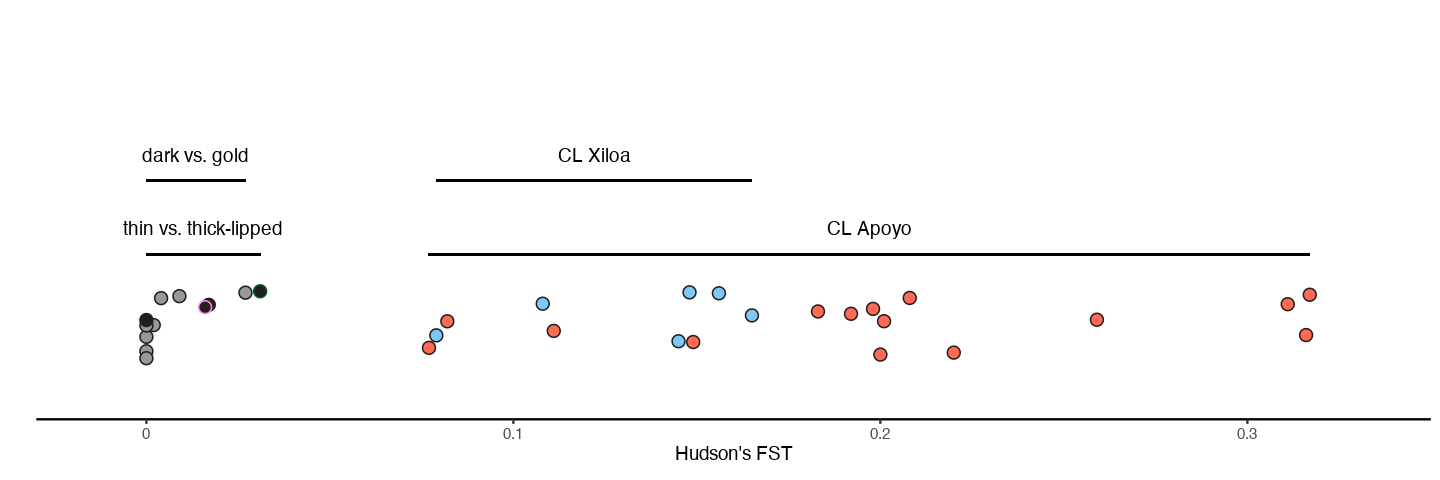

In [17]:
options(repr.plot.width=12, repr.plot.height=4)

pop.fsts<-read.csv("population_fsts.csv",sep=",") #load summary table with genome wide fsts
y<-runif(n=nrow(pop.fsts), min=.03, max=.05) # to avoid that points plot on top of each other we add some 'noise' for the y-axis
apoyo.min.max<-c(min(pop.fsts$Genome.wide.FST[pop.fsts$fill=="#FF6B53"]),max(pop.fsts$Genome.wide.FST[pop.fsts$fill=="#FF6B53"]))
xiloa.min.max<-c(min(pop.fsts$Genome.wide.FST[pop.fsts$fill=="#7DC8F7"]),max(pop.fsts$Genome.wide.FST[pop.fsts$fill=="#7DC8F7"]))
lips.min.max<-c(min(pop.fsts$Genome.wide.FST[pop.fsts$fill=="#231f20"]),max(pop.fsts$Genome.wide.FST[pop.fsts$fill=="#231f20"]))
gold.min.max<-c(min(pop.fsts$Genome.wide.FST[pop.fsts$fill=="#999999"]),max(pop.fsts$Genome.wide.FST[pop.fsts$fill=="#999999"]))

ggplot(data = pop.fsts) + theme_classic()+ coord_fixed() + theme(axis.line.y =element_blank(), axis.ticks.y = element_blank()) +
          geom_point(aes(x = Genome.wide.FST, y = y), pch=21, cex=3,col=pop.fsts$color,fill=pop.fsts$fill) +
          scale_x_continuous(name="Hudson's FST",breaks = c(0,0.1,0.2,0.3),labels = c(0,0.1,0.2,0.3),expand=c(0,0),limits=c(-0.03,0.35)) +
          scale_y_continuous(name="",limits = c(0.02,.12),labels=c())+
          geom_segment(aes(y = .06, x = apoyo.min.max[1], yend = .06, xend = apoyo.min.max[2]))+
          annotate("text", y = .067, x=mean(apoyo.min.max), label = "CL Apoyo")+
          geom_segment(aes(y = .08, x = xiloa.min.max[1], yend = .08, xend = xiloa.min.max[2]))+
          annotate("text", y = .087, x=mean(xiloa.min.max), label = "CL Xiloa")+
          geom_segment(aes(y = .06, x = lips.min.max[1], yend = .06, xend = lips.min.max[2]))+
          annotate("text", y = .067, x=mean(lips.min.max), label = "thin vs. thick-lipped")+
          geom_segment(aes(y = .08, x = gold.min.max[1], yend = .08, xend = gold.min.max[2]))+
          annotate("text", y = .087, x=mean(gold.min.max), label = "dark vs. gold")

<H2> 8. Figure 4b–i (Genomic divergence across the species complex) </H2>
b-i, Differentiation across the genome is overall low between thin- and thick-lipped populations and species, with a pronounced, shared peak of high differentiation on chr. 8 and another one on chr. 24 in the GLs and CL Masaya populations. In contrast, 3–10x higher levels of genomic differentiation are found among all sympatric species pairs of CLs Apoyo and Xiloá. Differentiation was estimated as Hudson’s FST in non-overlapping 10-kb windows with loess-smoothed values shown as red lines (all pairwise comparisons: Extended Data Fig. 8).

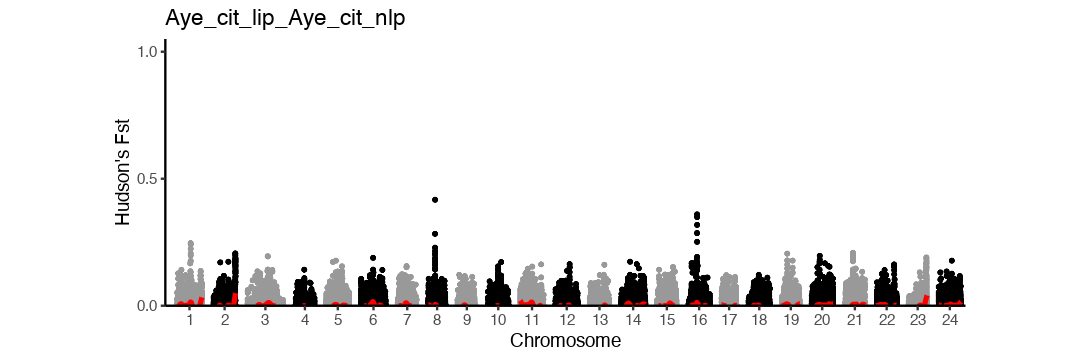

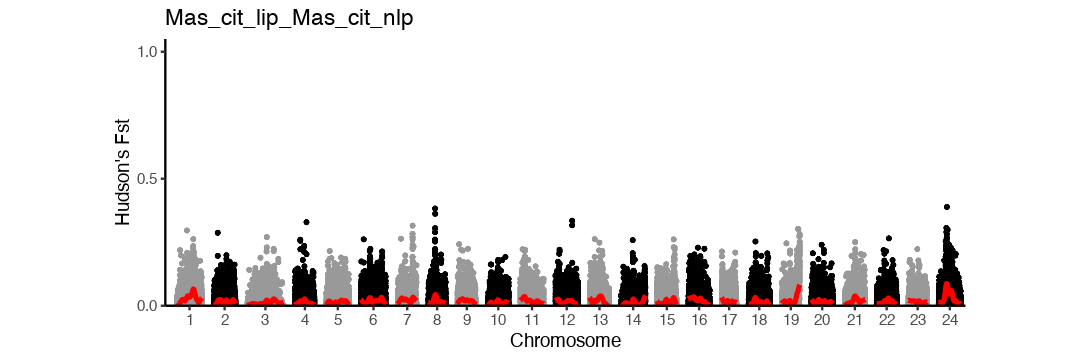

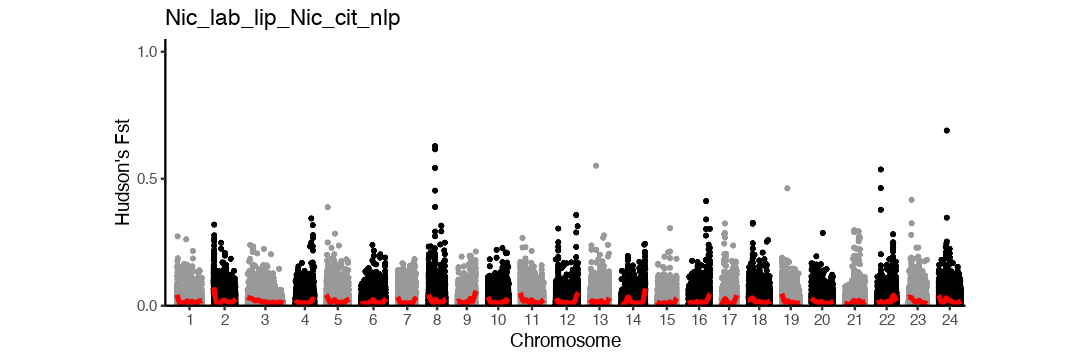

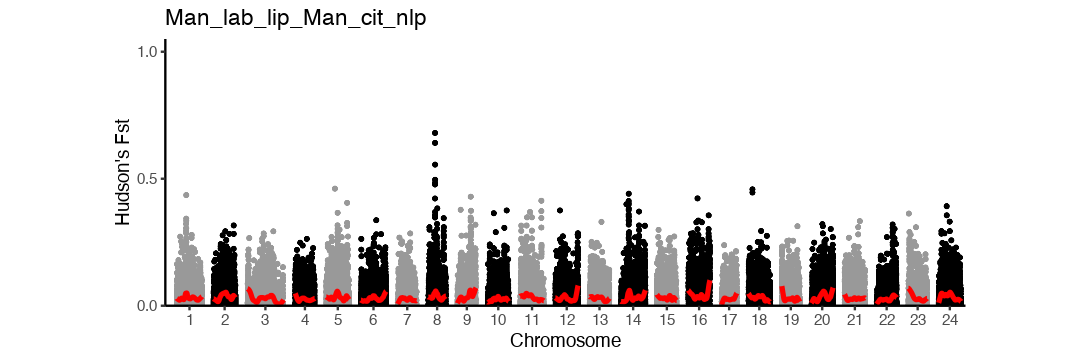

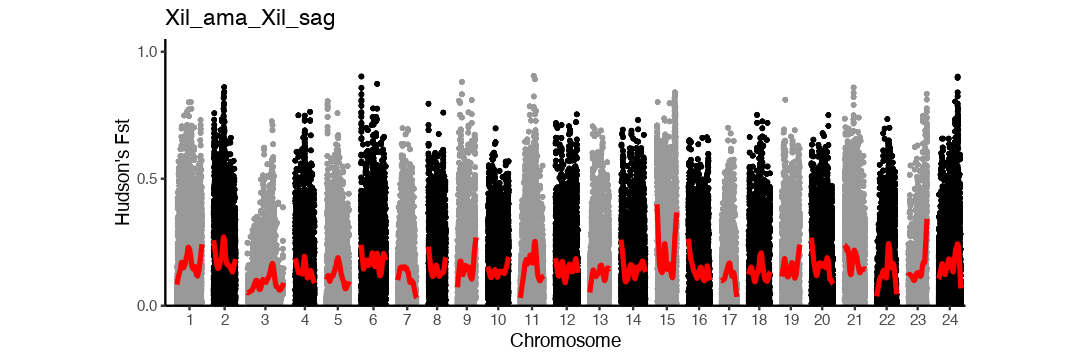

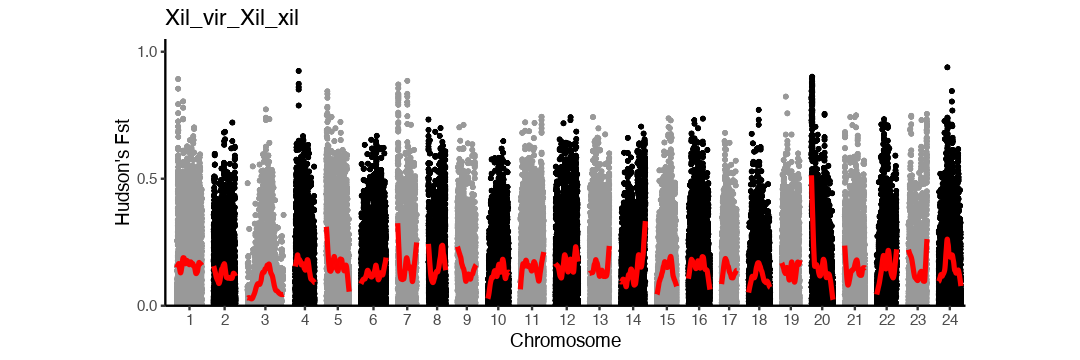

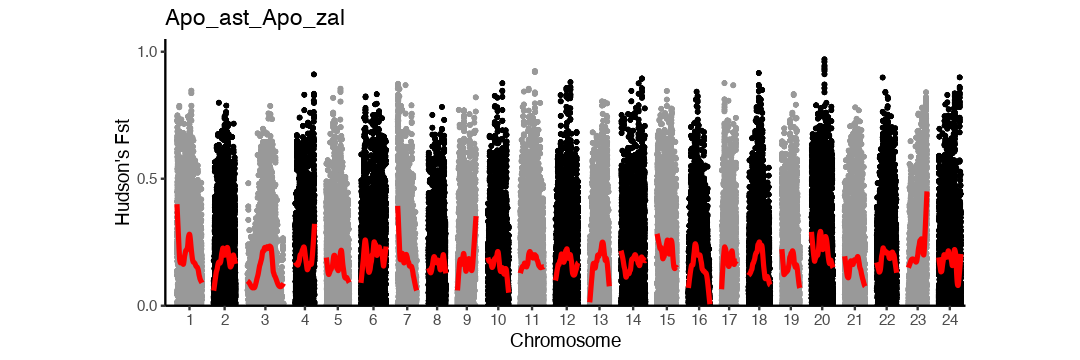

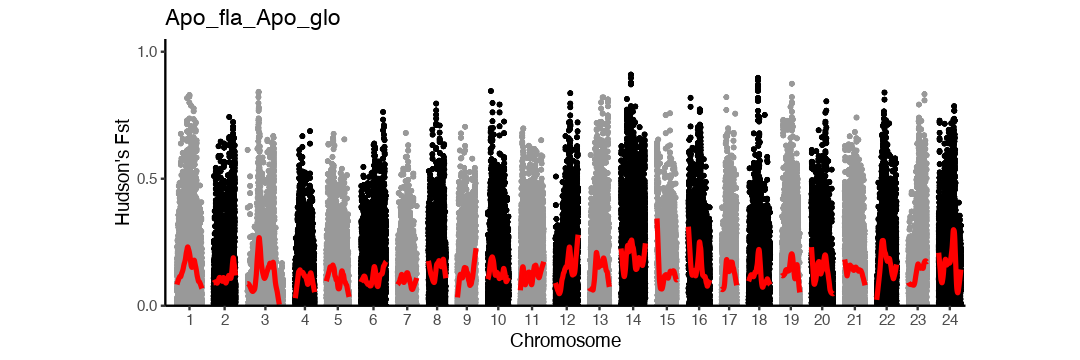

In [18]:
options(repr.plot.width=9, repr.plot.height=3)

genome.scan.selection<-c("genomescans/genomescan_Aye_cit_lip_Aye_cit_nlp_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Mas_cit_lip_Mas_cit_nlp_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Nic_lab_lip_Nic_cit_nlp_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Man_lab_lip_Man_cit_nlp_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Xil_ama_Xil_sag_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Xil_vir_Xil_xil_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Apo_ast_Apo_zal_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Apo_fla_Apo_glo_10kb_10kb_masked.bed")
color<-c("grey60","black")
genome.scan.list<-list()
 

## combine all files in one data.frame

for (genome.scan in genome.scan.selection) {
    genome.scan.tmp <- read.csv(genome.scan,sep="\t")
    genome.scan.tmp$Comparison <- str_sub(genome.scan,24,-22) # Read FST data with an extra column for name of the comparison
    genome.scan.list[[genome.scan]] <- genome.scan.tmp 
}
  
genome.scans <- data.frame(do.call(rbind, genome.scan.list))
colnames(genome.scans)[colnames(genome.scans) == "chrom"]<-c("CHR")
rownames(genome.scans)<-c()


## create 'continuous genome' including the spacer defined above and add position values from gwas data frame
for (i in 1:24) {
    genome.scans$ContBP[genome.scans$CHR==i] <- Genome2[i]
  }
  genome.scans$BP <- ((genome.scans$start+genome.scans$end)/2) # we use the center of each window
  genome.scans$BP <- (genome.scans$ContBP+genome.scans$BP)/1000000

  genome.scans<-na.omit(genome.scans[,colnames(genome.scans) %in% c("CHR","BP","SNP","fst_hudson","Comparison")])

comparisons<-unique(genome.scans$Comparison)

## add loess smoothening and plot comparisons
for (comparison in comparisons) {
    genome.scans.red <- genome.scans[genome.scans$Comparison==comparison,]
    
    ## calculate loess smoothening — because of the spacers we added before there will be no smoothening 'across' chromosome
    y.loess <- loess(genome.scans.red$fst_hudson~genome.scans.red$BP, span=0.01, degree = 1, family = "gaussian") 
    y.predict <- predict(y.loess, data.frame(x=genome.scans.red$fst_hudson))
    
    ##data.frame with values of loess smoothening
    y.predict.df<-data.frame(CHR=genome.scans.red$CHR,BP=genome.scans.red$BP,y.predict=y.predict) 

    P <-  ggplot(data = genome.scans.red) + 
                        theme_classic() + 
                        theme(aspect.ratio = 1/3) +
                        expand_limits(x = 0, y = 0) + 
                        theme(legend.position="none") +
                        ggrastr::geom_point_rast(aes(x = BP, y = fst_hudson,col=as.factor(CHR)), pch=16, cex=1.5,na.rm=T,raster.width = 7.5,raster.height = 2.5) +
                        scale_x_continuous(name ="Chromosome", breaks = Genome3,labels = 1:24,expand=c(0,0),limits=c(0,limit)) +
                        scale_y_continuous(name="Hudson's Fst",limits = c(0,1.05),breaks=c(0,0.5,1),expand=c(0,0)) +
                        scale_color_manual(values = rep(c("grey60","black"),12)) +
                        ggtitle(label = comparison) +
                        geom_line(aes(x = y.predict.df$BP, y= y.predict.df$y.predict, group=y.predict.df$CHR), col="red",lwd=1.1) 
    
    suppressWarnings(print(P)) 
    }

<H2> 9. Figure 4r–y — pie charts (Genomic divergence across the species complex) </H2>
r–y, Genome-wide (pie charts) and chromosome-specific (bar plots) proportions of non-overlapping genomic windows under divergent selection within lakes (≥0.99 support). Only a few windows are detected in CL Apoyeque (r), CL Masaya (s) and GLs Nicaragua (t) and Managua (u) including the regions on chromosomes 8 and 24 that are associated with lip size. In pair-wise comparisons of sympatric species of CLs Xiloá (v, A. amarillo vs. A. sagittae and w, A. viridis vs. A. xiloaensis) and Apoyo (x, A. astorquii vs. A. zaliosus and y, A. globosus vs. A. flaveolus) we find 5–122 times more windows under divergent selection.

all   divergent perc
Aye_cit_nlp_Aye_cit_lip.50kb 11307   11       0.1
Mas_cit_nlp_Mas_cit_lip.50kb 11307   23       0.2
Nic_cit_Nic_lab.50kb         11307  143       1.3
Man_cit_Man_lab.50kb         11307   89       0.8
Xil_ama_Xil_sag.50kb         11307  704       6.2
Xil_vir_Xil_xil.50kb         11307  945       8.4
Apo_ast_Apo_zal.50kb         11307  914       8.1
Apo_glo_Apo_fla.50kb         11307 1347      11.9

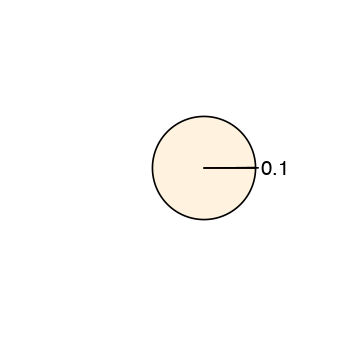

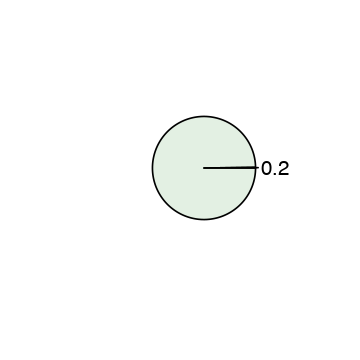

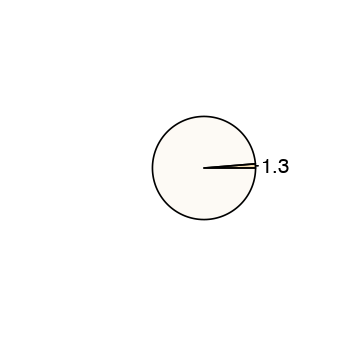

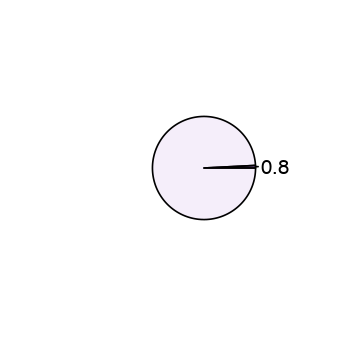

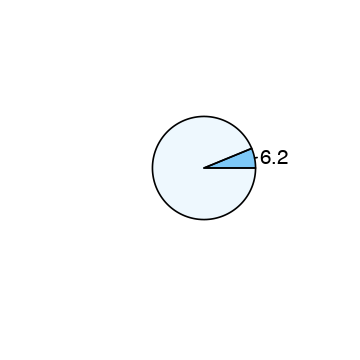

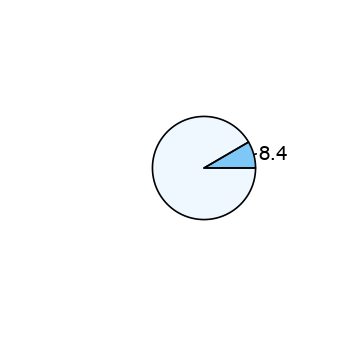

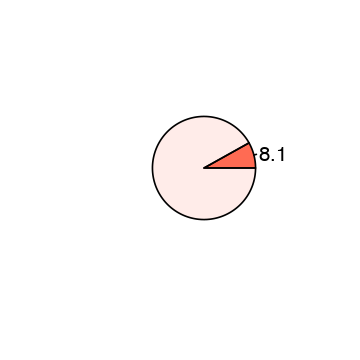

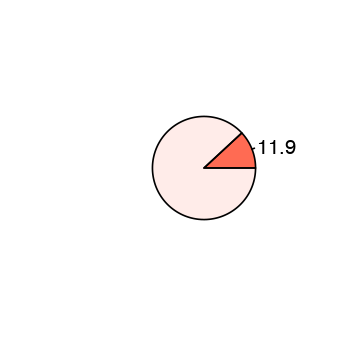

In [19]:
options(repr.plot.width=3, repr.plot.height=3)
diplo<-read.csv("diploshic_predictions.csv",sep = "\t",stringsAsFactors = F,header=F)
colnames(diplo)<-c("chrom","classifiedWinStart","classifiedWinEnd","predClass","prob.neutral.","prob.shared.","prob.divergent1.","prob.divergent2.","pop")

diplo$chrom<-factor(diplo$chrom,levels=c(1:24))
diplo$id<-paste0(diplo$chrom,":",diplo$classifiedWinStart,"-",diplo$classifiedWinEnd)
diplo$pop<-factor(diplo$pop,levels=c("Aye_cit_nlp_Aye_cit_lip.50kb","Mas_cit_nlp_Mas_cit_lip.50kb","Nic_cit_Nic_lab.50kb","Man_cit_Man_lab.50kb",
                                    "Xil_ama_Xil_sag.50kb","Xil_vir_Xil_xil.50kb","Apo_ast_Apo_zal.50kb","Apo_glo_Apo_fla.50kb")) #just for sorting we use factors
diplo<-diplo[order(diplo$pop),]
comps<-unique(diplo$pop)

## remove all windows that are not shared across all 8 pairwise comparisons
shared<-names(table(diplo$id)[table(diplo$id)==8])
diplo<-diplo[diplo$id %in% shared,] 

## calculate probability that a window is divergent in one of the two pops 1 & 2
diplo$prob.divergent <-diplo$prob.divergent1.+diplo$prob.divergent2.

threshold<-.99 #we use a threshold of 99%
summary<-data.frame(all=c(table(diplo$pop)),divergent=c(table(diplo$pop[diplo$prob.divergent>threshold])))               
summary$perc <- round(100*summary$divergent/summary$all,1) #percentage of windows under divergent selection

summary #summary table

## create pie charts of windwos under divergent vs. not under divergent selction
pie(c(summary$perc[1],100-summary$perc[1]),col=c("#FFA500","#FFA50020"),labels = c(summary$perc[1],""))
pie(c(summary$perc[2],100-summary$perc[2]),col=c("#228B22","#228B2220"),labels = c(summary$perc[2],""))
pie(c(summary$perc[3],100-summary$perc[3]),col=c("#F5DEB3","#F5DEB320"),labels = c(summary$perc[3],""))
pie(c(summary$perc[4],100-summary$perc[4]),col=c("#B57EDC","#B57EDC20"),labels = c(summary$perc[4],""))
pie(c(summary$perc[5],100-summary$perc[5]),col=c("#7DC8F7","#7DC8F720"),labels = c(summary$perc[5],""))
pie(c(summary$perc[6],100-summary$perc[6]),col=c("#7DC8F7","#7DC8F720"),labels = c(summary$perc[6],""))
pie(c(summary$perc[7],100-summary$perc[7]),col=c("#FF6B53","#FF6B5320"),labels = c(summary$perc[7],""))
pie(c(summary$perc[8],100-summary$perc[8]),col=c("#FF6B53","#FF6B5320"),labels = c(summary$perc[8],""))

<H2> 10. Figure 4r–y — barplots (Genomic divergence across the species complex) </H2>
r–y, Genome-wide (pie charts) and chromosome-specific (bar plots) proportions of non-overlapping genomic windows under divergent selection within lakes (≥0.99 support). Only a few windows are detected in CL Apoyeque (r), CL Masaya (s) and GLs Nicaragua (t) and Managua (u) including the regions on chromosomes 8 and 24 that are associated with lip size. In pair-wise comparisons of sympatric species of CLs Xiloá (v, A. amarillo vs. A. sagittae and w, A. viridis vs. A. xiloaensis) and Apoyo (x, A. astorquii vs. A. zaliosus and y, A. globosus vs. A. flaveolus) we find 5–122 times more windows under divergent selection.

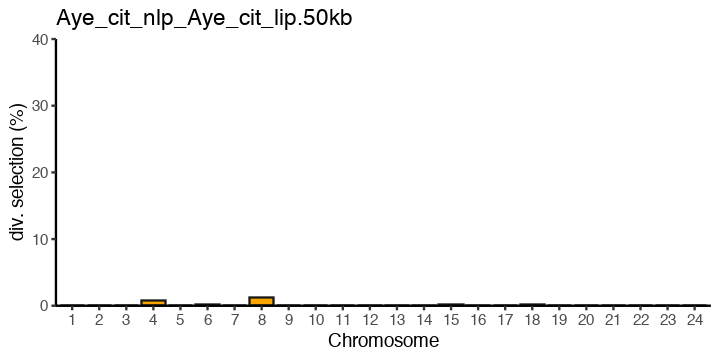

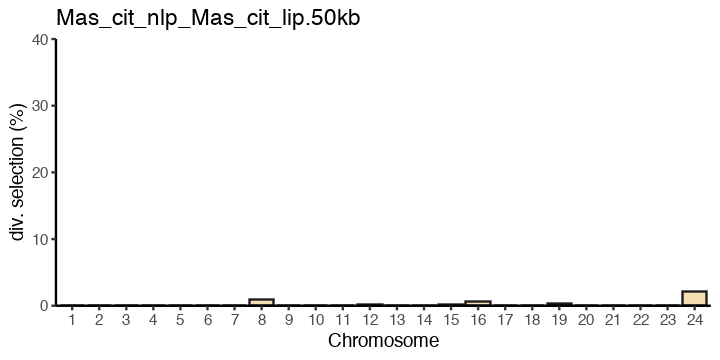

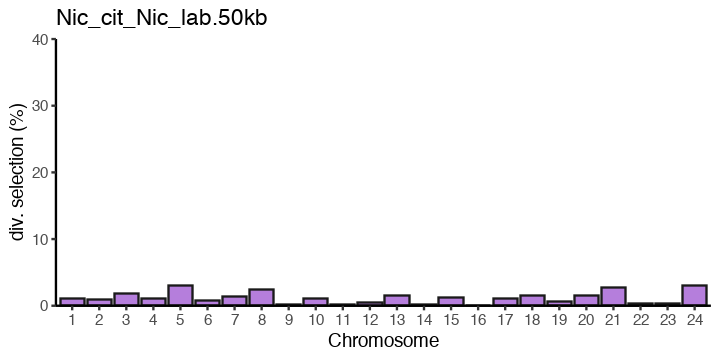

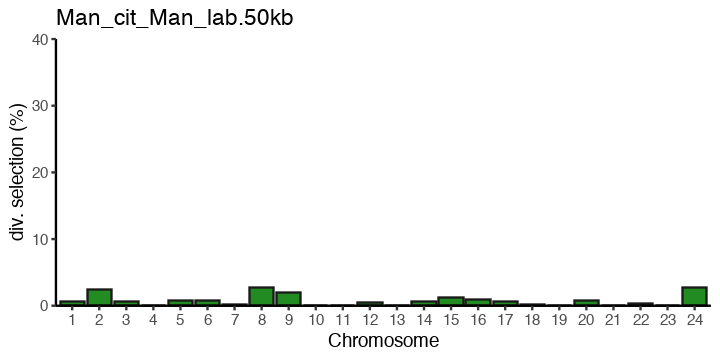

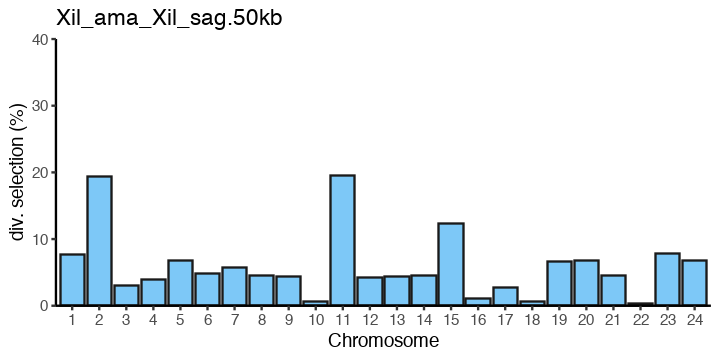

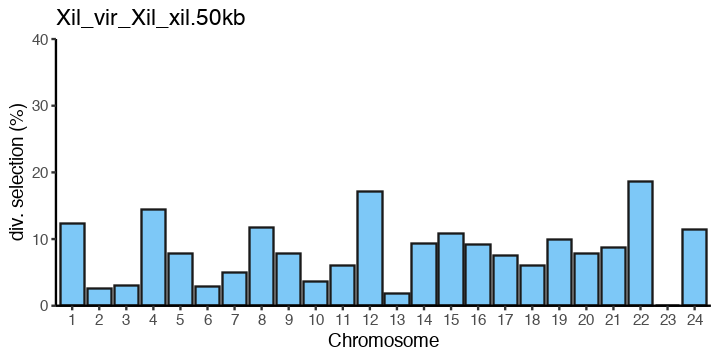

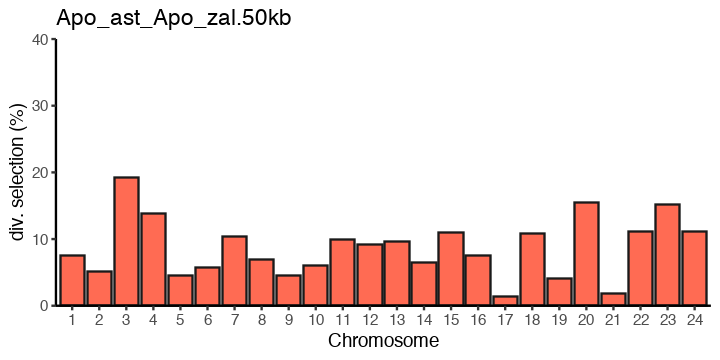

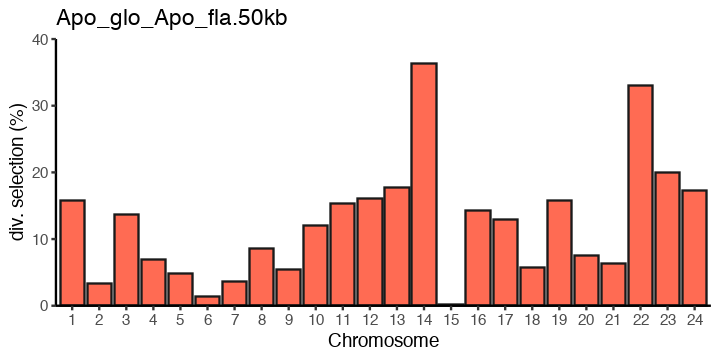

In [20]:
options(repr.plot.width=6, repr.plot.height=3)


## same thing as in 8. but now by chromosome
diplo$pop_chr<-paste0(diplo$pop,"-",diplo$chrom)
threshold<-.99
summary<-data.frame(names=names(c(table(diplo$pop_chr))),all=c(table(diplo$pop_chr)))
summary<-merge(summary, data.frame(names=names(c(table(diplo$pop_chr[diplo$prob.divergent>threshold]))),divergent=c(table(diplo$pop_chr[diplo$prob.divergent>threshold]))),by="names",all=T)
summary$divergent[is.na(summary$divergent)] <- 0
summary$perc <- round(100*summary$divergent/summary$all,1)
summary$pop <- factor(do.call(rbind, strsplit(as.character(summary[,1]),'-'))[,1],levels=levels(diplo$pop))
summary$chr <- factor(do.call(rbind, strsplit(as.character(summary[,1]),'-'))[,2],levels=c(1:24))
summary<-summary[order(summary$pop,summary$chr),]

max<-40
pops<-unique(summary$pop)
colors<-c("#FFA500","#F5DEB3","#B57EDC","#228B22","#7DC8F7","#7DC8F7","#FF6B53","#FF6B53")#color vector — we want to use the lake specific colors

## we plot the percentage per chromosome now as bar charts
for (pop in pops) {
    
color<-colors[which(pop == pops)[[1]]]
    
P <- ggplot(data = summary[summary$pop==pop,]) +
    geom_bar(aes(x=chr,y=perc),fill=color,color="grey10",stat = "identity")+
    theme_classic()+
    scale_y_continuous(limits=c(0,max),expand = c(0, 0),name = "div. selection (%)")+
    scale_x_discrete(name="Chromosome")+
    ggtitle(label = pops[which(pop == pops)[[1]]])
    
suppressWarnings(print(P)) 
}

<H2> 11. Extended Data Fig. 3  (Ancestry of crater lake populations and species. a-o, Ancestry proportions) </H2>
Ancestry proportions inferred with ChromoPainter. Inferred ancestry proportions for each crater lake population/species and chromosome derived from the two great lake species, A. citrinellus (lighter green/violet) and A. labiatus (darker green/violet) in the two great lakes Nicaragua (violet) and Managua (green). CL Apoyo (a-f) fish derive their ancestry from GL Nicaragua. CLs As. León (g), As. Managua (h), Apoyeque (g), Tiscapa (k), and Xiloá (l-o) fish derive their ancestry from GL Managua and CL Masaya (j) has mixed contributions from both GL Managua and GL Nicaragua.

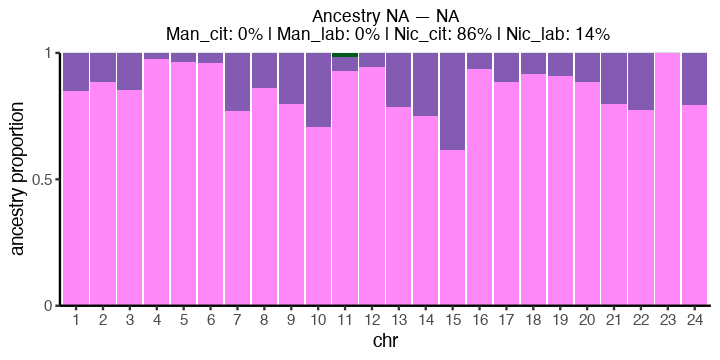

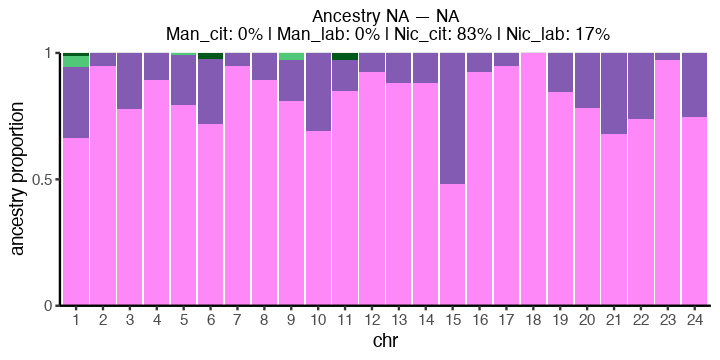

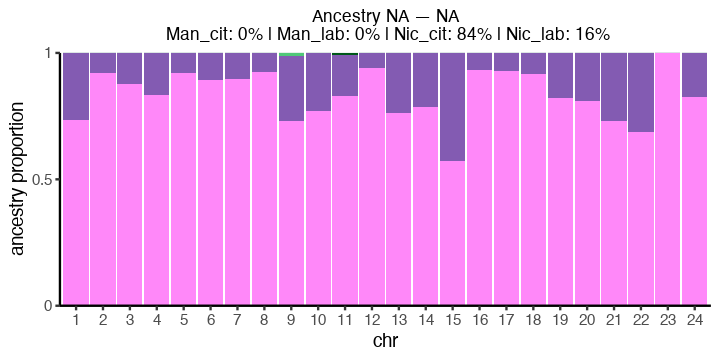

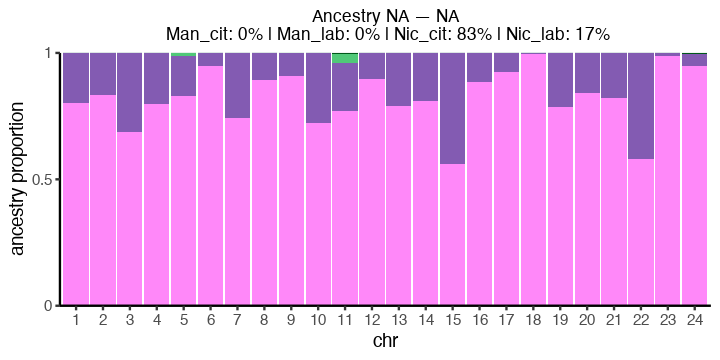

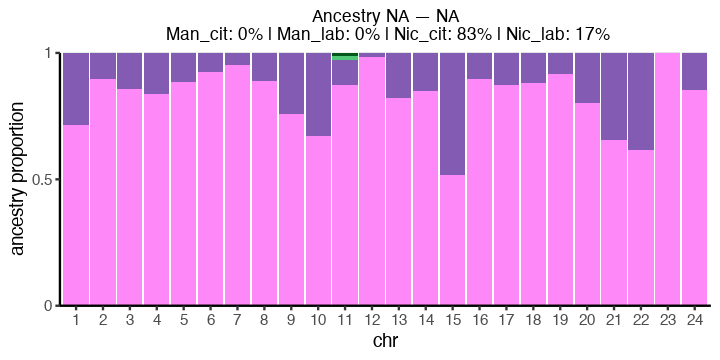

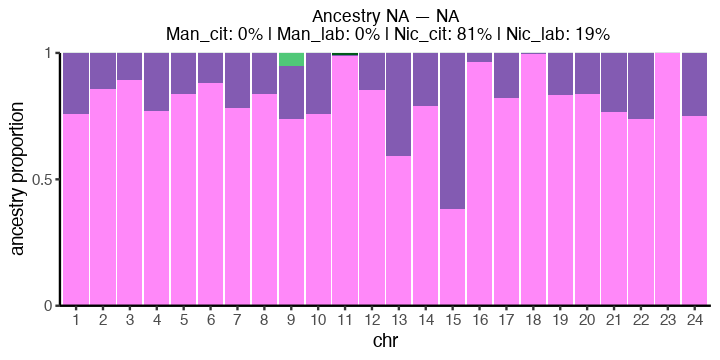

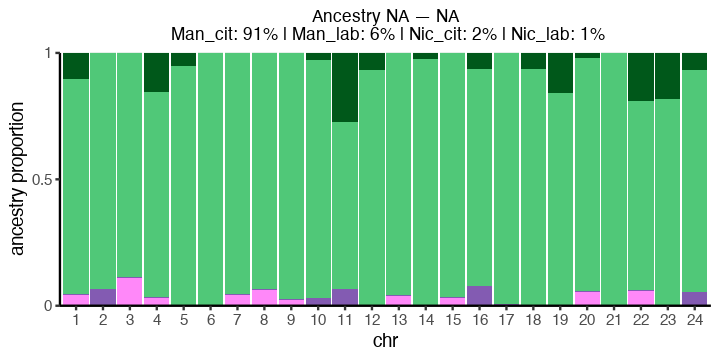

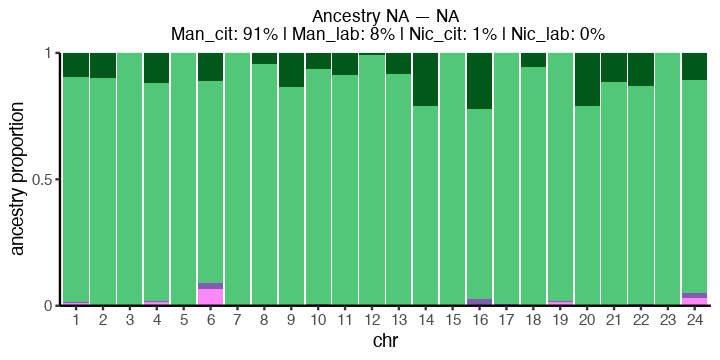

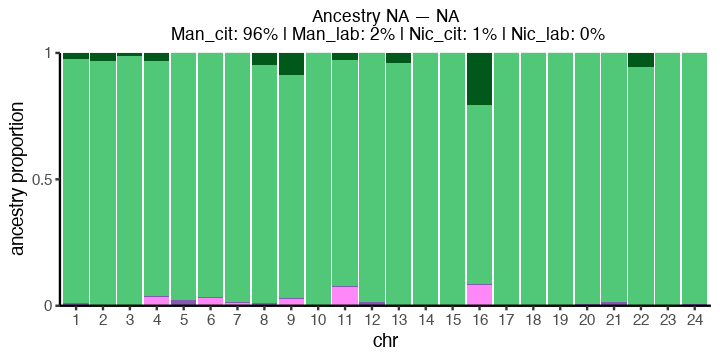

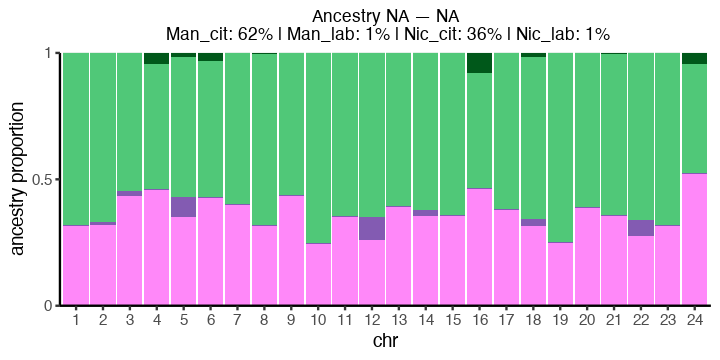

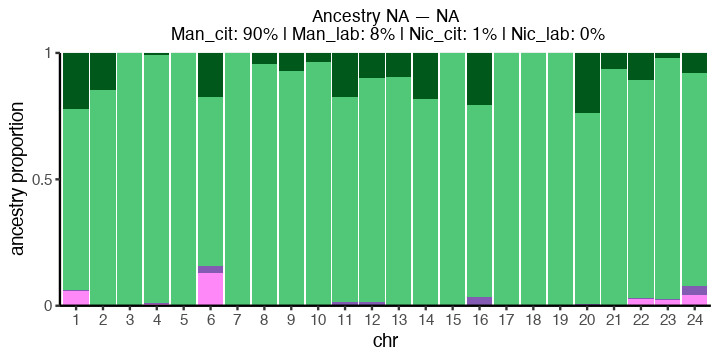

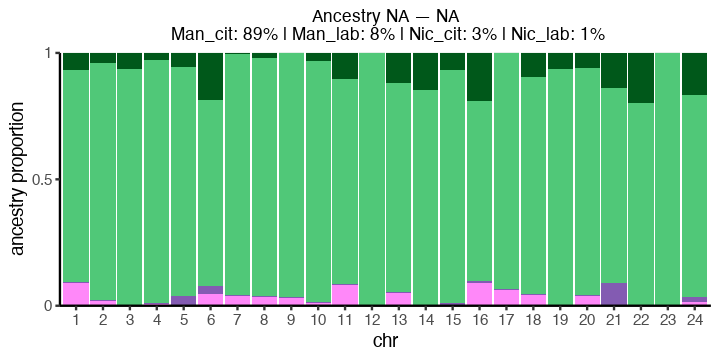

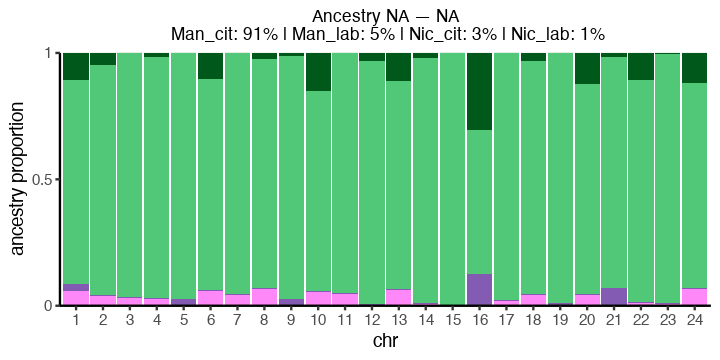

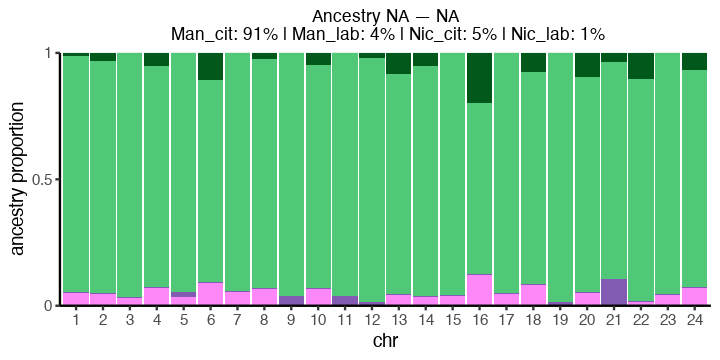

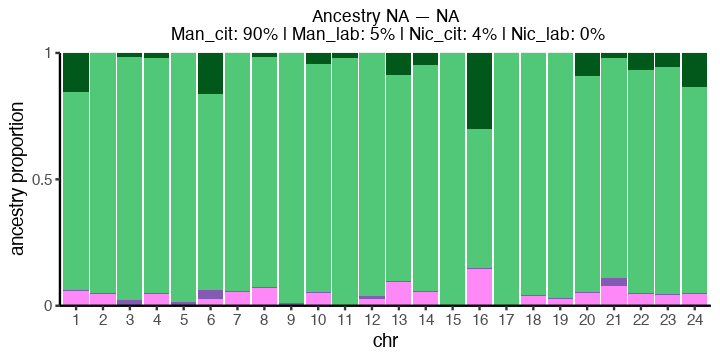

In [21]:
options(repr.plot.width=6, repr.plot.height=3)
chromopainter.files<-paste0("chromopainter/",list.files("chromopainter")) #list of chromopainter raw data

## loop through all populations
for (chromopainter in chromopainter.files){
    
chromo<-read.csv(chromopainter,sep="\t",skip=1,header=F,stringsAsFactors = F)[,1:4]
colnames(chromo)<-read.csv(chromopainter,stringsAsFactors = F,sep=" ",nrows =1,header=F)[1,1:4]
chromo$chr<-1:24
pop<-paste0(midas.df$Lake[midas.df$Group_short==str_sub(chromopainter,24,-17)][1], " — ",midas.df$Species[midas.df$Group_short==str_sub(chromopainter,24,-17)][1])
    
## split data into chromosomes    
chromo<-melt(chromo, id=c("chr")) 
colnames(chromo)<-c("chr","donor","percentage")

## make summary for tile (means across the genome)
summary<-cbind(aggregate(chromo[,3], list(chromo$donor), mean))
colnames(summary)<-c("donor","percentage")   
summary.title<-as.character(round(100*summary$percentage,0))
    
chromo$donor<-factor(chromo$donor,levels=c("Man_lab","Man_cit","Nic_lab","Nic_cit"))
chromo$chr<-factor(chromo$chr,levels=c(1:24))

## plot data by chromosome 
fill<-c("#00581A","#50C878","#835BB2","#FF88F9")
P <- ggplot(chromo, aes(x = chr, y = percentage,fill=donor)) +
      geom_bar(stat = "identity") + scale_fill_manual(values=fill) + theme_classic() + theme(legend.position = "none",plot.title = element_text(hjust = 0.5, size = 10)) + scale_y_continuous(name = "ancestry proportion",expand=c(0,0),breaks = c(0,.5,1),labels = c(0,0.5,1)) +
      ggtitle(paste0("Ancestry ",pop,"\n Man_cit: ",summary.title[1],"% | Man_lab: ",summary.title[2],"% | Nic_cit: ",summary.title[3],"% | Nic_lab: ",summary.title[4],"%"))

suppressWarnings(print(P))
}

<H2> 12. Extended Data Fig. 1 — Principal Component Analyses </H2>


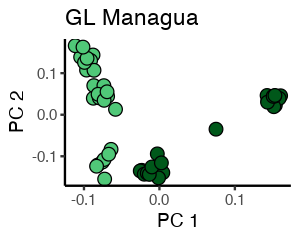

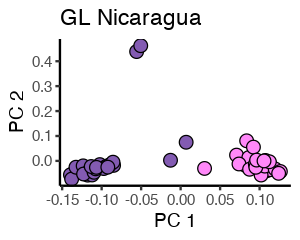

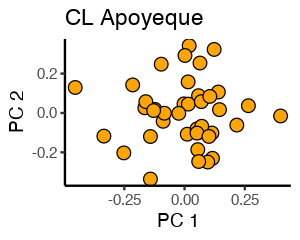

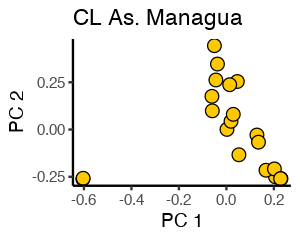

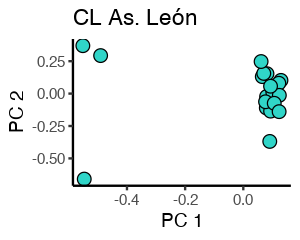

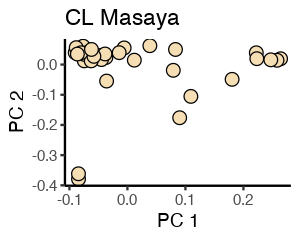

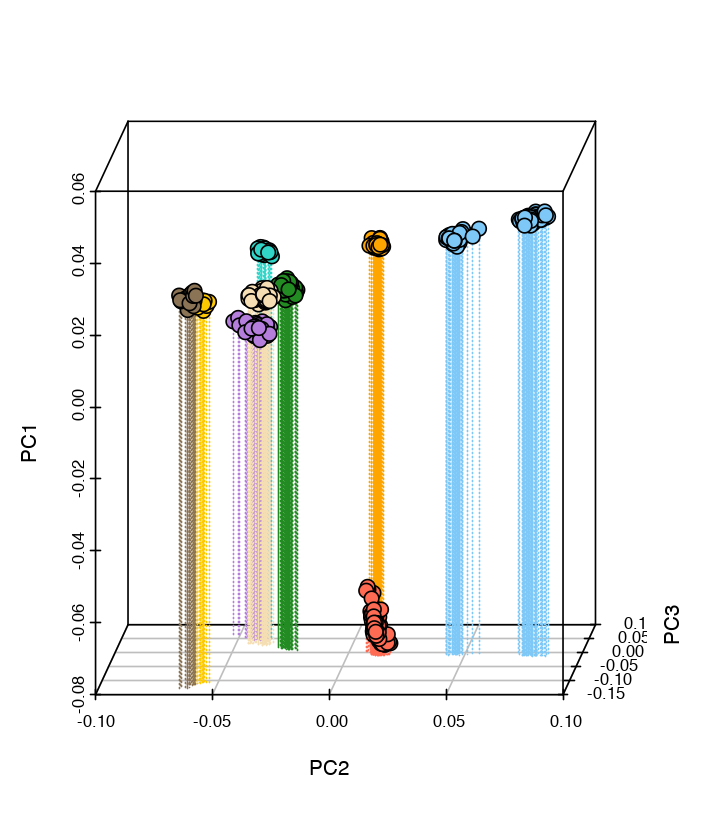

In [22]:
options(repr.plot.width=2.5, repr.plot.height=2)

comparisons1<-c('GL Managua','GL Nicaragua','CL Apoyeque','CL As. Managua','CL As. León','CL Masaya','CL Tiscapa')

for (comparison in comparisons1) {
    
### plotting the tSNE values and adding labels for lakes (species were added later on in Adobe Illustrator)
P <- ggplot(midas.df[midas.df$Lake==comparison,], aes(x = PC1_Lake_Specific, y = PC2_Lake_Specific)) +
                        theme_classic() +
                        ggtitle(comparison) +
                        scale_x_continuous(name ="PC 1")+scale_y_continuous(name ="PC 2")+
                        geom_point(aes(fill = Group_short),shape=21,stroke=.4,size=3.3,fill=midas.df$Color_species[midas.df$Lake==comparison])

suppressWarnings(print(P))
    
}

options(repr.plot.width=5, repr.plot.height=4.5)

comparison<-'CL Apoyo'
P<-scatterplot3d(z=-midas.df$PC1_Lake_Specific[midas.df$Lake==comparison], 
                   x=-midas.df$PC2_Lake_Specific[midas.df$Lake==comparison], 
                   y=midas.df$PC3_Lake_Specific[midas.df$Lake==comparison],
                   pch = " ", scale.y=3.7, lty.hplot=3, type = "h", angle = 85, 
                 color=gsub("#FFFFFF","grey80",midas.df$Color_species[midas.df$Lake==comparison]),  
            zlab=paste0("PC1"), 
            xlab=paste0("PC2"), 
            ylab=paste0("PC3"))
    
P$points(z=-midas.df$PC1_Lake_Specific[midas.df$Lake==comparison], 
                   x=-midas.df$PC2_Lake_Specific[midas.df$Lake==comparison], 
                   y=midas.df$PC3_Lake_Specific[midas.df$Lake==comparison],
                   pch = 21, cex = 1.5, bg=midas.df$Color_species[midas.df$Lake==comparison], col="black")

comparison<-'CL Xiloá'
P<-scatterplot3d(z=-midas.df$PC1_Lake_Specific[midas.df$Lake==comparison], 
                   x=-midas.df$PC2_Lake_Specific[midas.df$Lake==comparison], 
                   y=midas.df$PC3_Lake_Specific[midas.df$Lake==comparison],
                   pch = " ", scale.y=3.7, lty.hplot=3, type = "h", angle = 85, 
                 color=gsub("#FFFFFF","grey80",midas.df$Color_species[midas.df$Lake==comparison]), 
            zlab=paste0("PC1"), 
            xlab=paste0("PC2"), 
            ylab=paste0("PC3"))
    
P$points(z=-midas.df$PC1_Lake_Specific[midas.df$Lake==comparison], 
                   x=-midas.df$PC2_Lake_Specific[midas.df$Lake==comparison], 
                   y=midas.df$PC3_Lake_Specific[midas.df$Lake==comparison],
                   pch = 21, cex = 1.5, bg=midas.df$Color_species[midas.df$Lake==comparison], col="black")

options(repr.plot.width=6, repr.plot.height=7)

comparison<-'all'
P<-scatterplot3d(z=midas.df$PC1_All, 
                   x=-midas.df$PC2_All, 
                   y=midas.df$PC3_All,
                   pch = " ", scale.y=.25, lty.hplot=3, type = "h", angle = 70, color=midas.df$Color_lake, 
            zlab=paste0("PC1"), 
            xlab=paste0("PC2"), 
            ylab=paste0("PC3"))
    
P$points(z=midas.df$PC1_All, 
                   x=-midas.df$PC2_All, 
                   y=midas.df$PC3_All,
                   pch = 21, cex = 1.5, bg=midas.df$Color_lake, col="black")


<H2> 13. Extended Data Fig. 6 (Focal phenotypic traits </H2>
a-e, Phenotypic distributions for lip size (a) (normalized by body area and log10-transformed), the first three axes of a principal component analysis on geometric morphometric data (b-d), and maximum pharyngeal tooth area (e) (normalized).

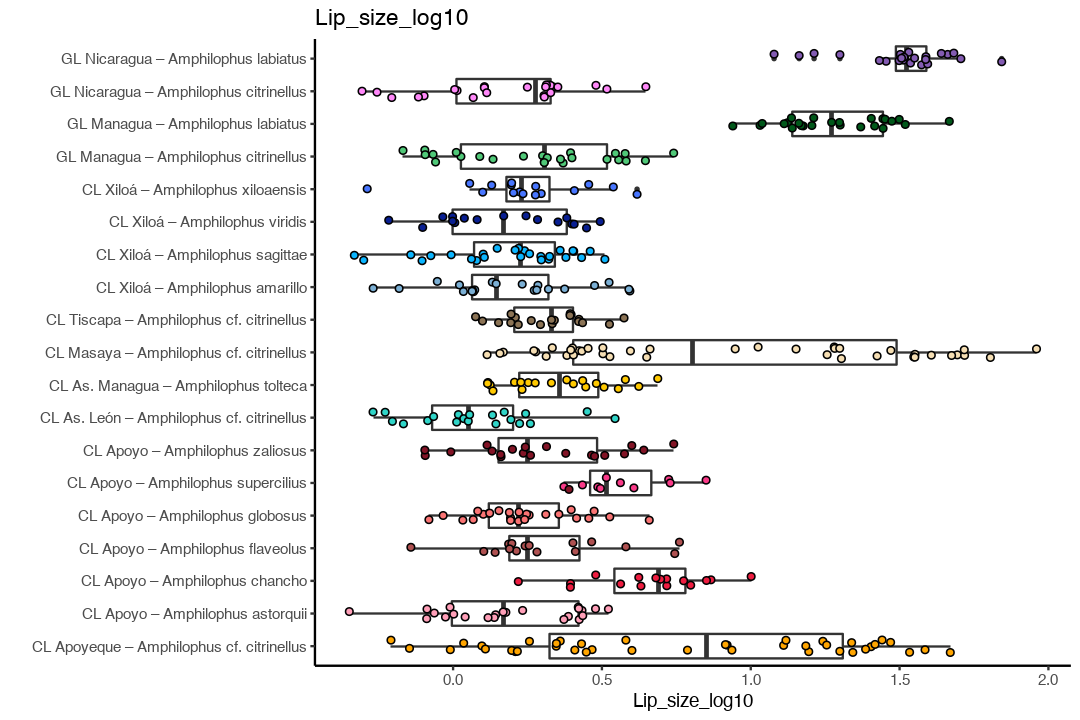

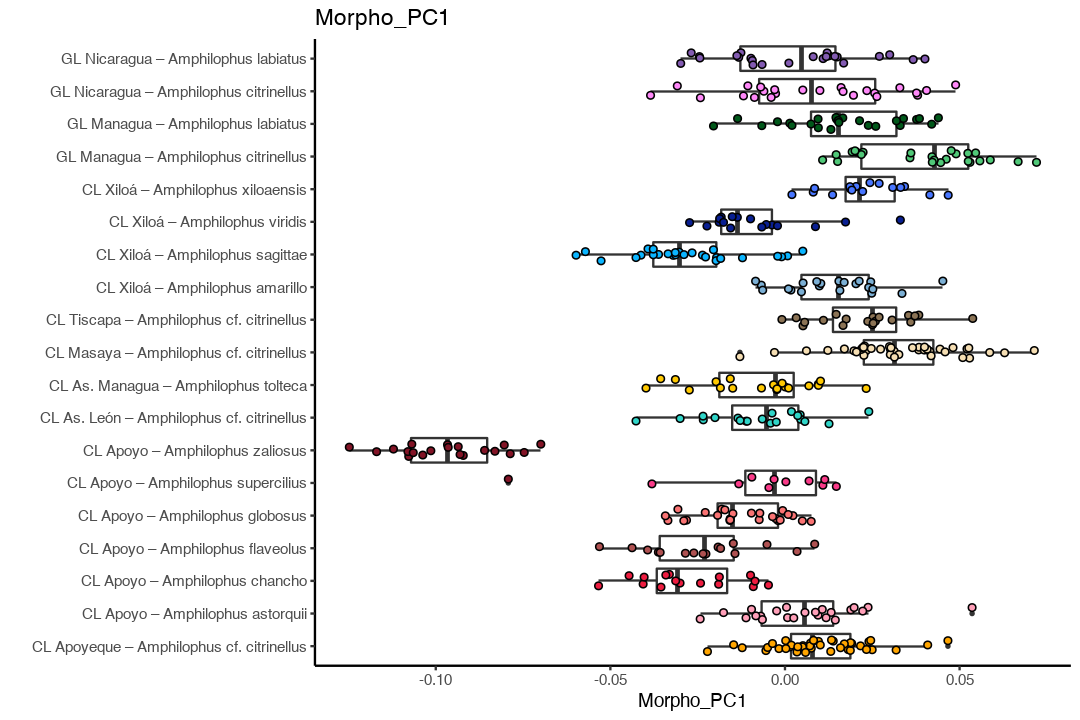

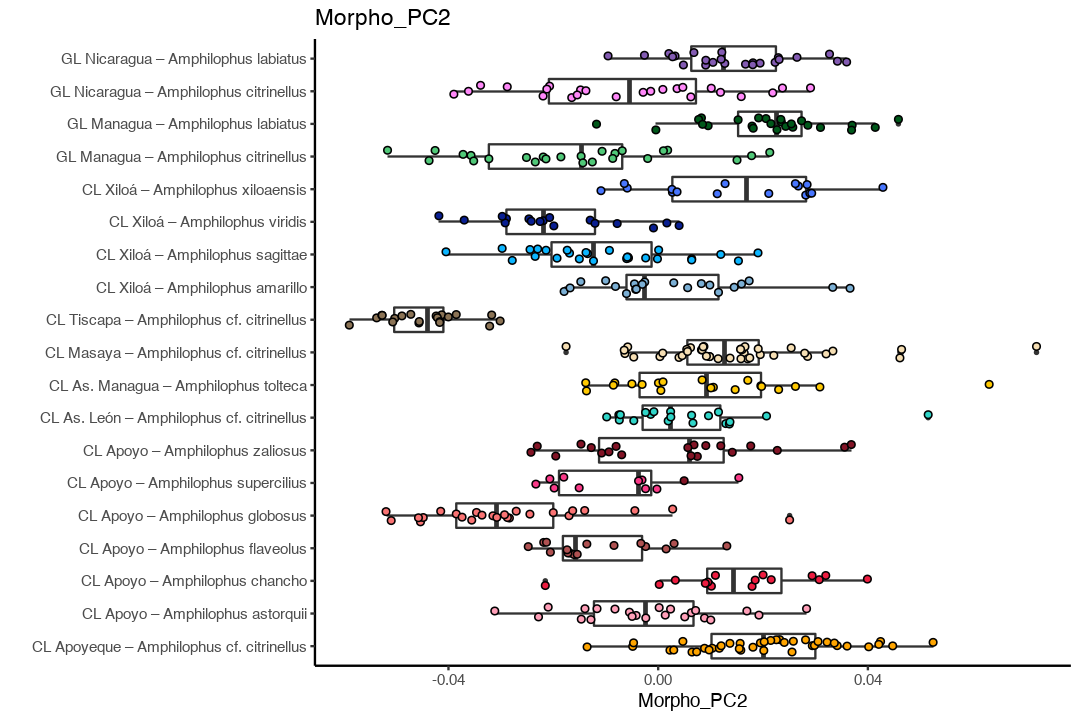

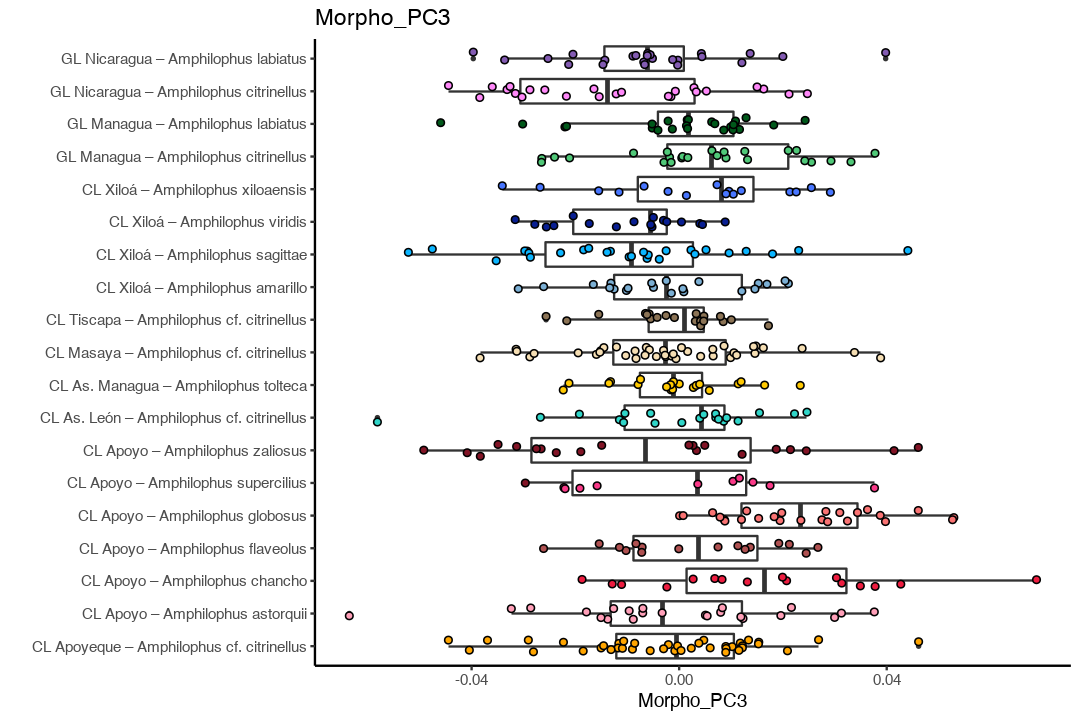

In [23]:
options(repr.plot.width=9, repr.plot.height=6)

traits<-c("Lip_size_log10","Morpho_PC1","Morpho_PC2","Morpho_PC3","Jaws_Max_Tooth_Size_Residuals")

## loop through traits
for (trait in traits) {
    
midas.df.red <- midas.df[!is.na(midas.df[trait]) & !grepl("hybrid", midas.df$Species), c("Group_short","Lake","Species","Color_species",trait)]
colnames(midas.df.red)[colnames(midas.df.red)==trait]<-"trait"
midas.df.red$Group_short<-factor(midas.df.red$Group_short,levels=rev(levels(midas.df$Group_short)))
midas.df.red<-midas.df.red[order(midas.df.red$Group_short),]  
midas.df.red$Group_long<- paste0(midas.df.red$Lake, " – ", midas.df.red$Species) # generate long species name for axis description

## Simple boxplots by trait and population
P <- ggplot(midas.df.red, aes(x = Group_long, y= trait)) + theme_classic()+
  geom_boxplot(outlier.size = NULL)+
  geom_jitter(position = position_jitter(0.2), shape=21, fill=midas.df.red$Color_species ,color = "black") +
  theme(legend.position="none",axis.title.y = element_text(hjust = 0.5)) + coord_flip() + 
  scale_y_continuous(name = trait) + scale_x_discrete(name = "")+
  ggtitle(trait)
    
suppressWarnings(print(P))
    
}

<H2> 14. Extended Data Fig. 7e-h (Analyses of candidate regions underlying focal traits) </H2>
Genome-wide association mapping in the four lakes that harbor thick-lipped fish reveals two regions of high association, one on chr. 8 and another slightly weaker one on chr. 24. The locus on chr. 8 is detected as the most-highly associated locus independently in each of the four lakes, whereas association on chr. 24 is strong in GL Nicaragua (e), much weaker in GL Managua (f) and CL Masaya (g), and essentially absent in CL Apoyeque (h).

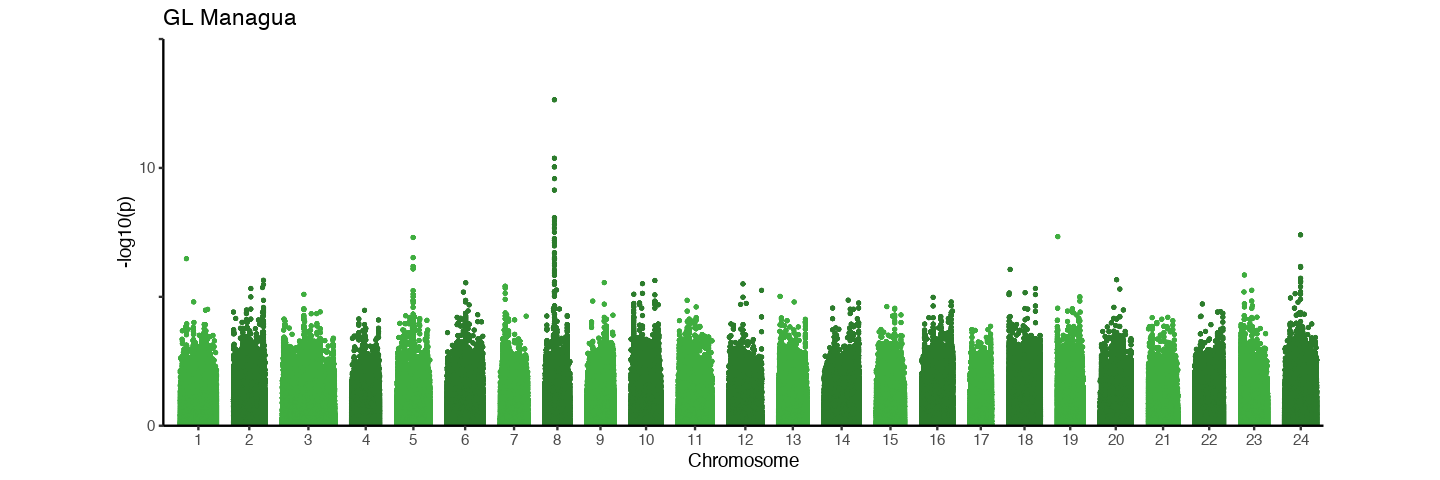

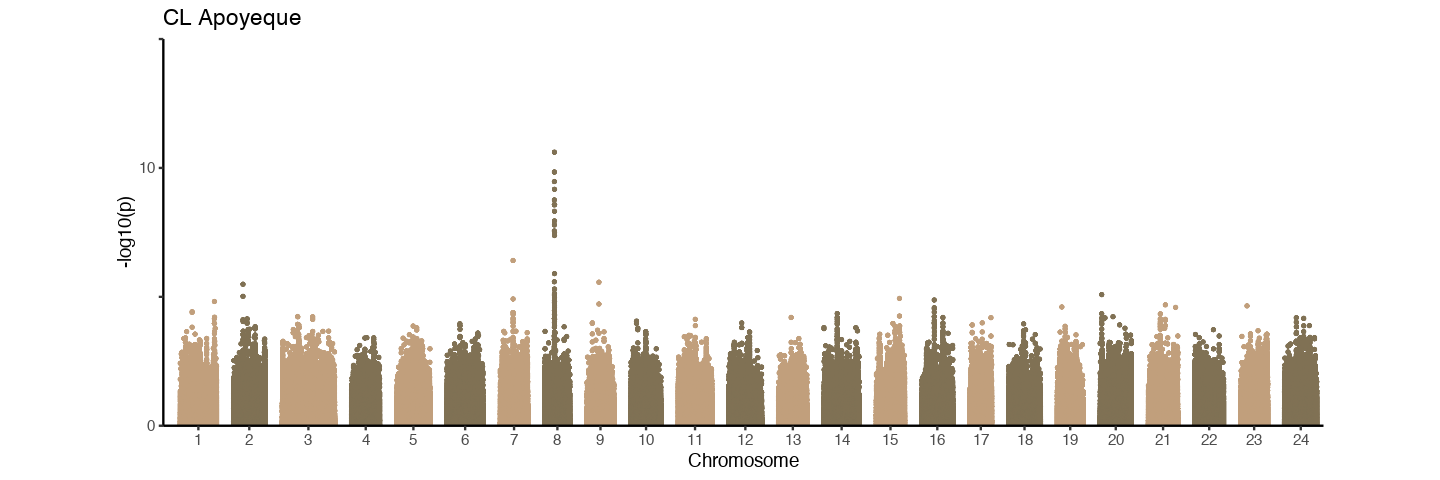

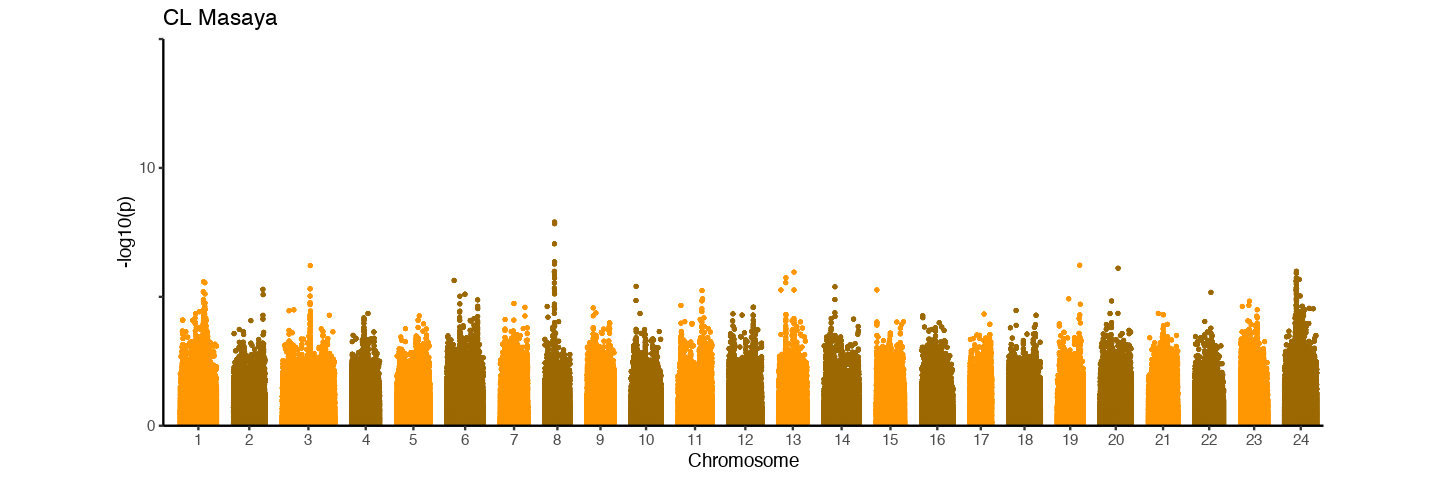

In [24]:
options(repr.plot.width=12, repr.plot.height=4)

gwass<-c("gwas/gwas_Nicaragua_lipsize.ps","gwas/gwas_Managua_lipsize.ps","gwas/gwas_Apoyeque_lipsize.ps","gwas/gwas_Masaya_lipsize.ps")


## we use the lake specific colors and a lighter version of it to distinguish chromosomes better
color1<-c("#9e71ff","#3fad3f","#c19f7c","#ff9702")
color2<-c("#6d4a98","#2c7c2c","#807154","#9b6802")
y.max<-15

lakes<-c("GL Nicaragua","GL Managua","CL Apoyeque","CL Masaya")

## plot gwas by population (same as in 5.)

for (gwas in gwass) {

    gwasResults <-data.frame(read.csv(gwas,sep="\t", header=F),stringsAsFactors = F)[,c(1,2,4)]
    colnames(gwasResults)<-c("CHR","BP","P")
    gwasResults$ContBP<-c()
    
    for (k in 1:24) {
        gwasResults$ContBP[gwasResults$CHR==k] <- Genome2[k]
    }
    title<-lakes[which(gwas == gwass)[[1]]]
    color<-c(color1[which(gwas == gwass)[[1]]],color2[which(gwas == gwass)[[1]]])
    
    gwasResults$BP <- (gwasResults$ContBP+gwasResults$BP)/1000000
    gwasResults$pLog10<- -log10(gwasResults$P)    #calc. -log10(pval)
    
    P <-ggplot(data = gwasResults) + 
          theme_classic() + 
          theme(aspect.ratio = 1/3) + 
          expand_limits(x = 0, y = 0) + 
          theme(legend.position="none") +
          ggtitle(label = title) +
          ggrastr::geom_point_rast(aes(x = BP, y = pLog10,col=as.factor(CHR)), pch=16, cex=1.5,na.rm=T,raster.width = 12,raster.height = 4) +
          scale_x_continuous(name ="Chromosome", breaks = Genome3,labels = 1:24,expand=c(0,0),limits=c(0,limit)) +
          scale_y_continuous(name="-log10(p)",limits = c(0,y.max),expand=c(0,0),breaks=c(0,5,10,15),labels = c(0,"",10,"")) +
          scale_color_manual(values = rep(color,12)) +
          geom_vline(xintercept=spacers, col="white",lwd=1)
    
    suppressWarnings(print(P))
    
    }

<H2> 15. Extended Data Fig. 7i–l (Analyses of candidate regions underlying focal traits) </H2>
Cross- population extended haplotype homozygosity (XP-EHH) analyses show that haplotypes within the most highly associated region on chr. 8 (see e-h) are on average much shorter in thin- than thick-lipped fish for GLs Nicaragua (i), Managua (j) and CLs Masaya (k) and Apoyeque (l), providing evidence for a strong selective sweep in thick-lipped fish. 

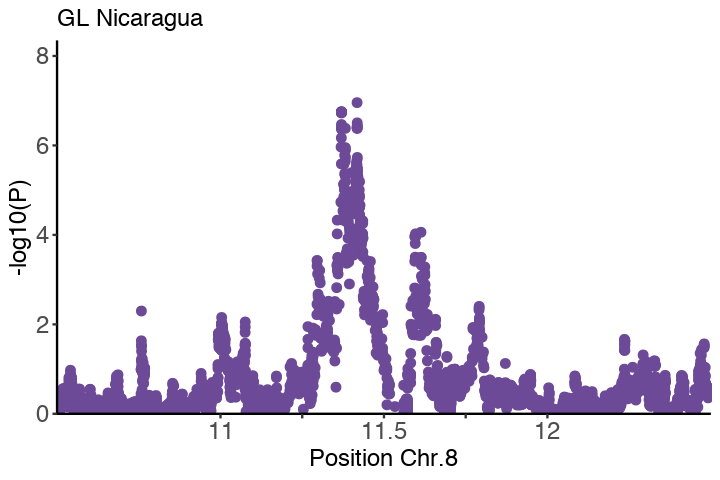

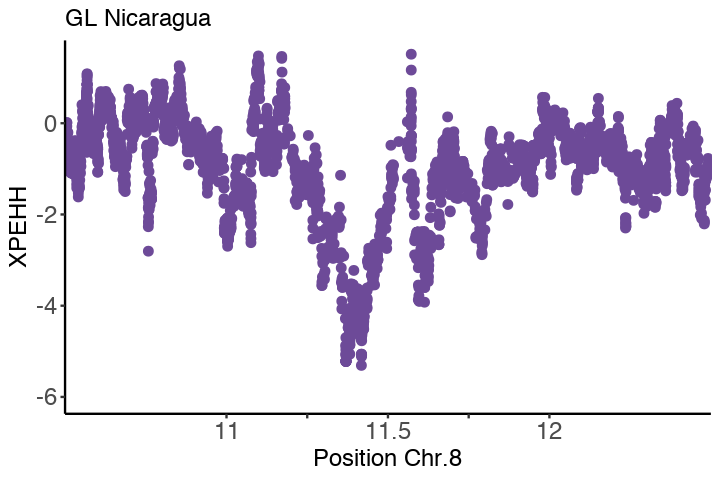

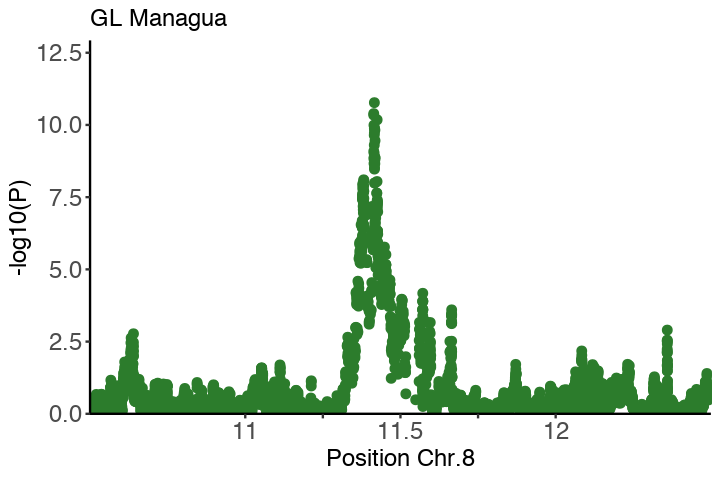

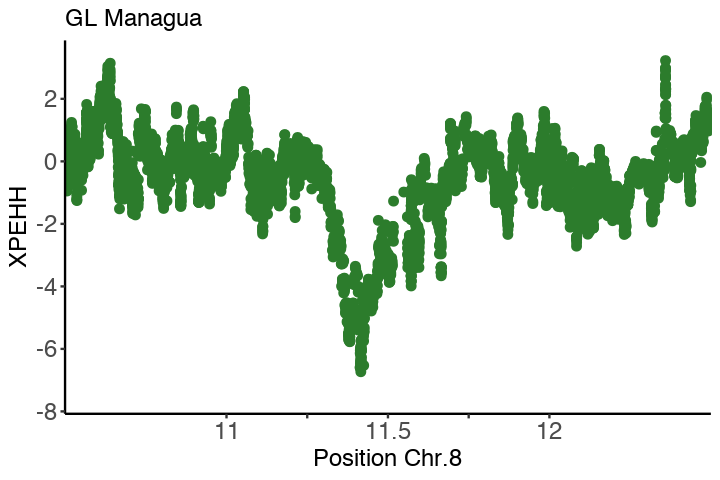

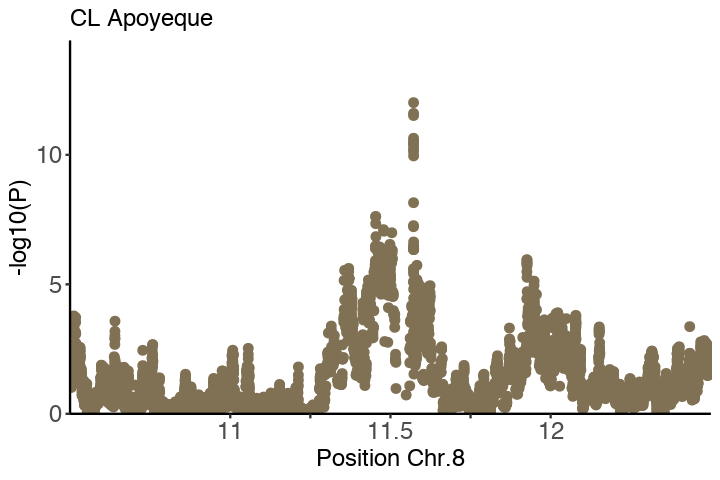

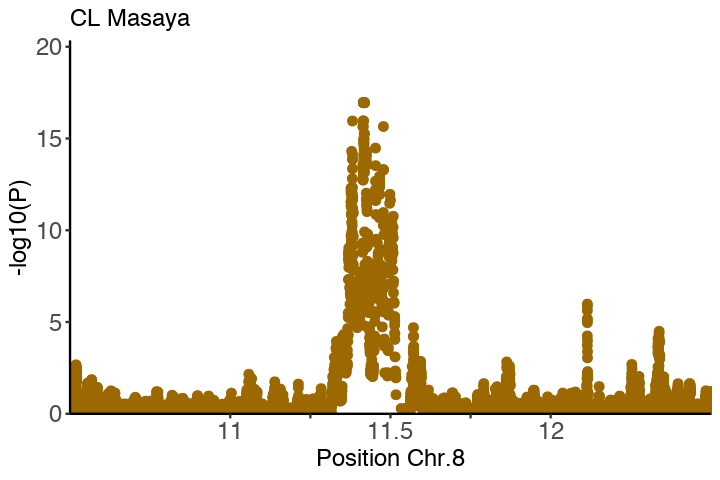

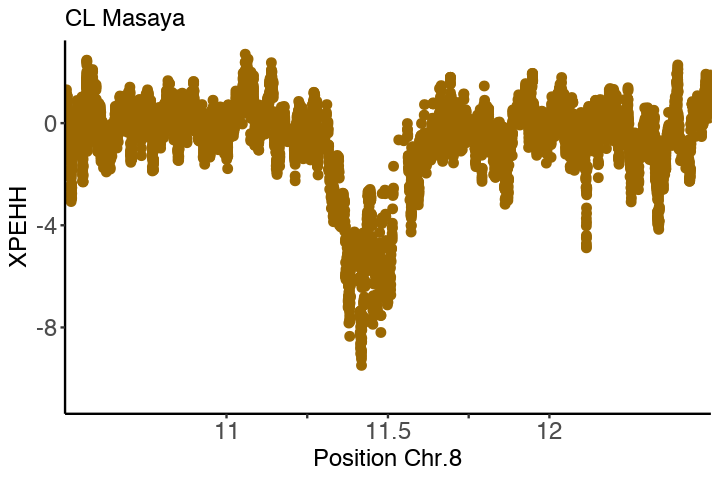

In [25]:
options(repr.plot.width=6, repr.plot.height=4)


## load xpehh data
xpehhs<-paste0("xpehh/",list.files("xpehh"))


colors<-c("#6d4a98","#2c7c2c","#807154","#9b6802") #lake specific colors for plotting
lakes<-c("GL Nicaragua","GL Managua","CL Apoyeque","CL Masaya")
target.window<-c(8,10500000,12500000) #this defines the target window: Chr, Start and End
P<-list()


## loop through the lakes
for (xpehh in xpehhs) {

xpehh.dat<-read.csv(xpehh,stringsAsFactors = F,sep="\t")
xpehh.dat<-xpehh.dat[xpehh.dat$CHR==target.window[1] & xpehh.dat$POSITION>=target.window[2] & xpehh.dat$POSITION<=target.window[3],] #filter for target window

xpehh.dat$pos <- xpehh.dat$POSITION/1000000 ## transform into Mbp
xpehh.dat$pval <- xpehh.dat$X.log10.p.value...bilateral #changing columnname

title<-lakes[which(xpehh == xpehhs)[[1]]]
color<-colors[which(xpehh == xpehhs)[[1]]]

## plotting pvalue    
P1 <- ggplot(data = xpehh.dat) + 
         theme_classic() + 
         expand_limits(x = 0, y = 0) + 
         theme(legend.position="none") +
         theme(legend.position="none",axis.text=element_text(size=14),
         axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=14,face="bold")) +
         scale_x_continuous(name ="Position Chr.8", expand=c(0,0),limits=c(target.window[2]/1000000,target.window[3]/1000000), breaks=c(11,11.25,11.5,11.75,12.00),labels=c("11","","11.5","","12"))+
         geom_point(aes(x = pos, y = pval),color=color,cex=2) +
         scale_y_continuous(name="-log10(P)", expand=c(0,0),limits=c(0,max(xpehh.dat$pval)*1.2)) +
         ggtitle(label = title)

suppressWarnings(print(P1))

## plotting xpehh    
P2 <- ggplot(data = xpehh.dat) + 
         theme_classic() + 
         expand_limits(x = 0, y = 0) + 
         theme(legend.position="none",axis.text=element_text(size=14),
         axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=14,face="bold")) +
         scale_x_continuous(name ="Position Chr.8", expand=c(0,0),limits=c(target.window[2]/1000000,target.window[3]/1000000), breaks=c(11,11.25,11.5,11.75,12.00),labels=c("11","","11.5","","12"))+
         geom_point(aes(x = pos, y = XPEHH),color=color,cex=2) +
         scale_y_continuous(name="XPEHH", expand=c(0,0),limits=c(min(xpehh.dat$XPEHH)*1.2,max(xpehh.dat$XPEHH)*1.2)) +
         ggtitle(label = title)

suppressWarnings(print(P2))    

}

<H2> 16. Extended Data Fig. 7p (Analyses of candidate regions underlying focal traits) </H2>
Lip size is bimodally distributed in all four lakes that harbor thick-lipped fish.

In [26]:
options(repr.plot.width=12, repr.plot.height=6)

### here we only look at lips in the lakes with lips (otherwise the same as 11.)
trait<-"Lip_size_log10"
midas.df.red <- midas.df[!is.na(midas.df[trait]) & !grepl("hybrid", midas.df$Species), c("Group_short","Lake","Species","Color_species","Lip_size_binary",trait)]
midas.df.red <- midas.df.red[midas.df.red$Lake %in% c("GL Managua","GL Nicaragua","CL Apoyeque","CL Masaya"),]
midas.df.red$Group_short<-factor(midas.df.red$Group_short,levels=rev(levels(midas.df$Group_short)))
midas.df.red<-midas.df.red[order(midas.df.red$Group_short),]  
midas.df.red$Group_long<- paste0(midas.df.red$Lake, " – ", midas.df.red$Species, " – ", midas.df.red$Lip_size_binary)
    
P <- ggplot(midas.df.red, aes(x = Group_long, y= Lip_size_log10)) +
  geom_boxplot(outlier.size = NULL)+ theme_classic()+
  geom_jitter(position = position_jitter(0.2), shape=21, fill=midas.df.red$Color_species ,color = "black") +
  theme(legend.position="none",axis.title.y = element_text(hjust = 0.5)) + coord_flip() + 
  scale_y_continuous(name = trait) + scale_x_discrete(name = "")+
  ggtitle(trait)
    
suppressWarnings(print(P))

<H2> 17. Extended Data Fig. 8 (Pairwise FST comparisons) </H2>
Genomic landscapes of differentiation among sympatric species in CLs Apoyo and CL Xiloá, between thin- versus thick-lipped fish, and between dark and gold fish within populations/species. FST was calculated in 10-kb non-overlapping windows and red lines indicate loess-smoothed values. Plots shown in 7 are not plotted again.

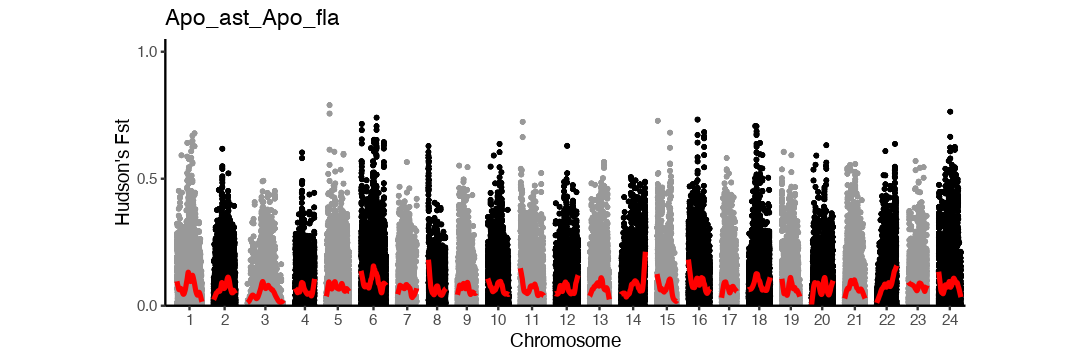

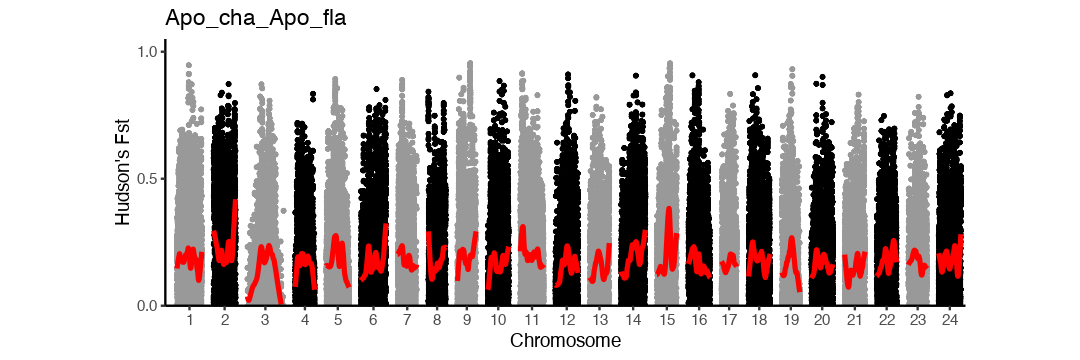

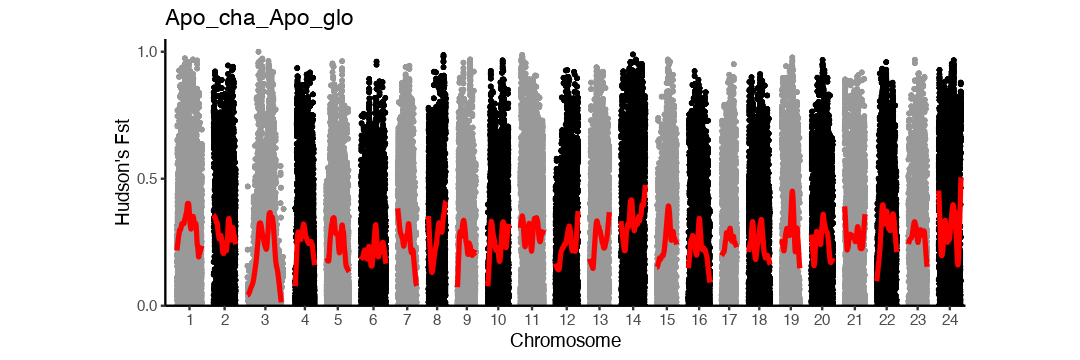

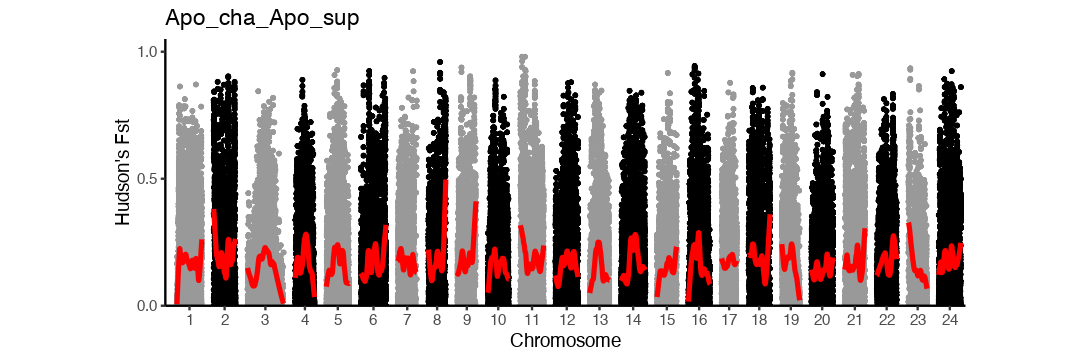

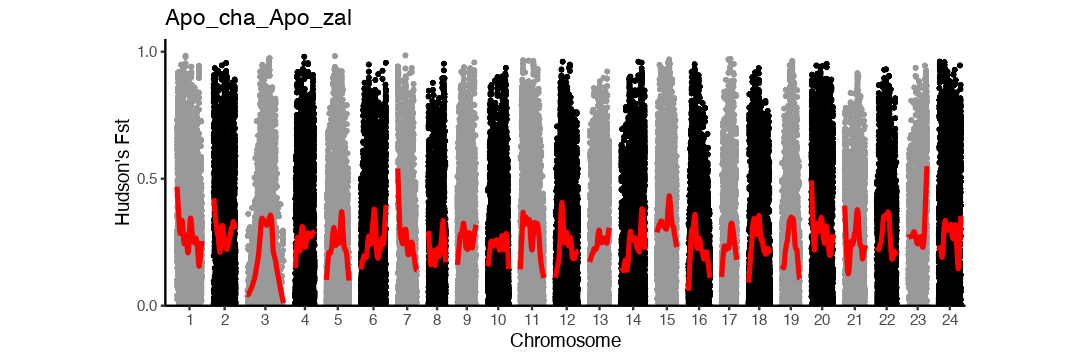

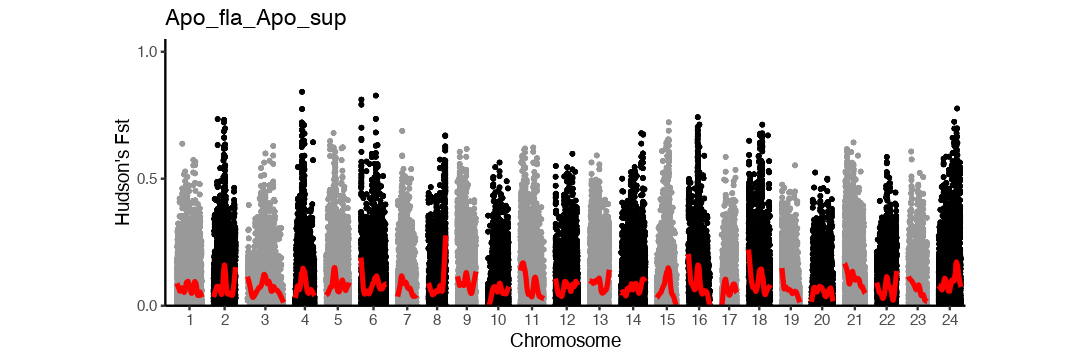

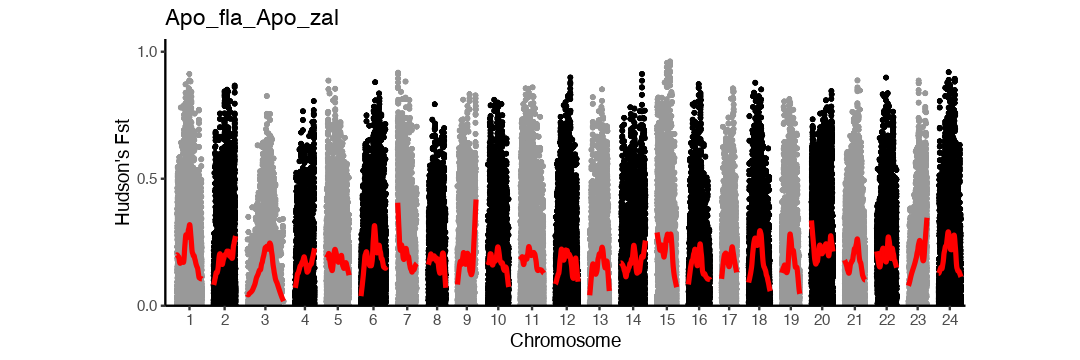

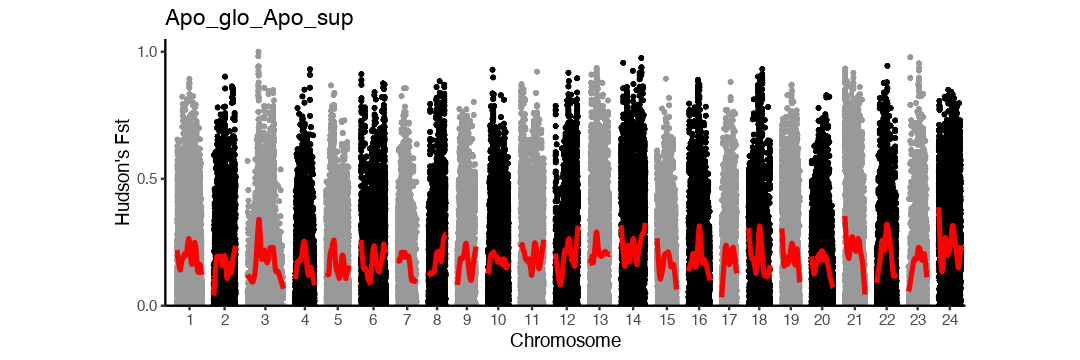

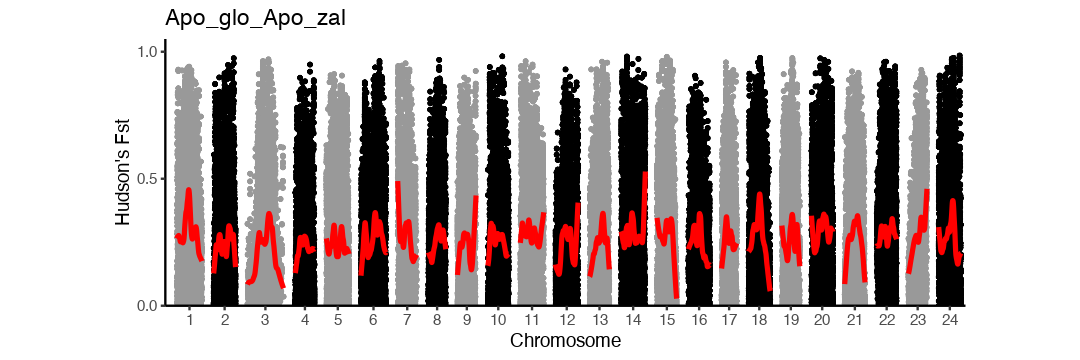

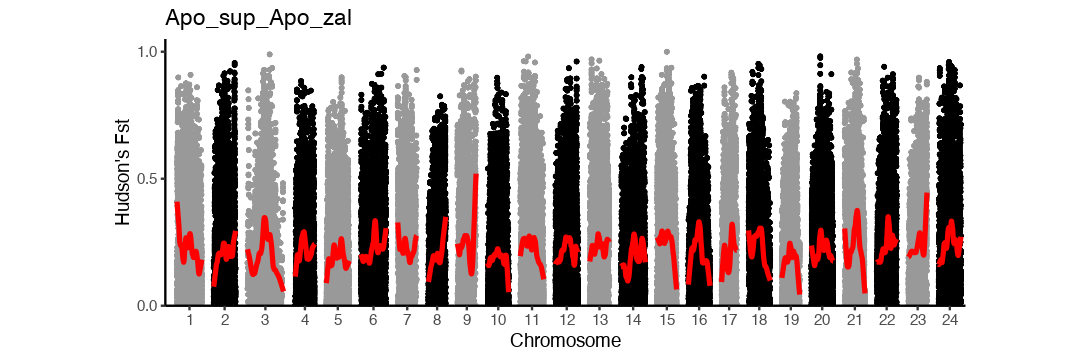

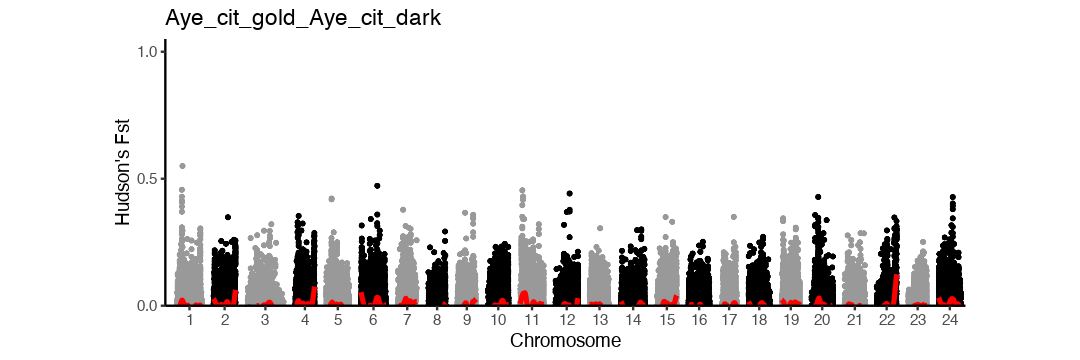

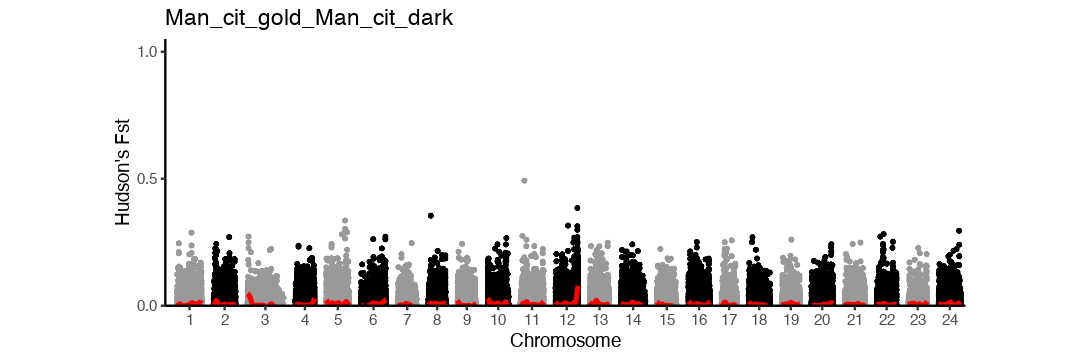

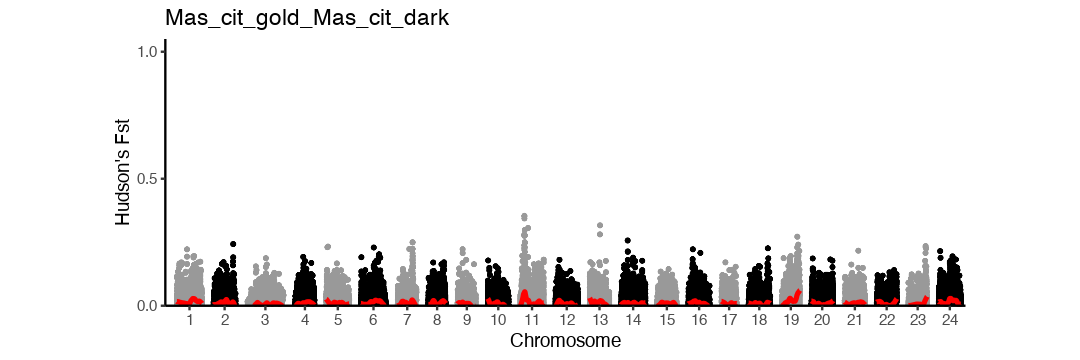

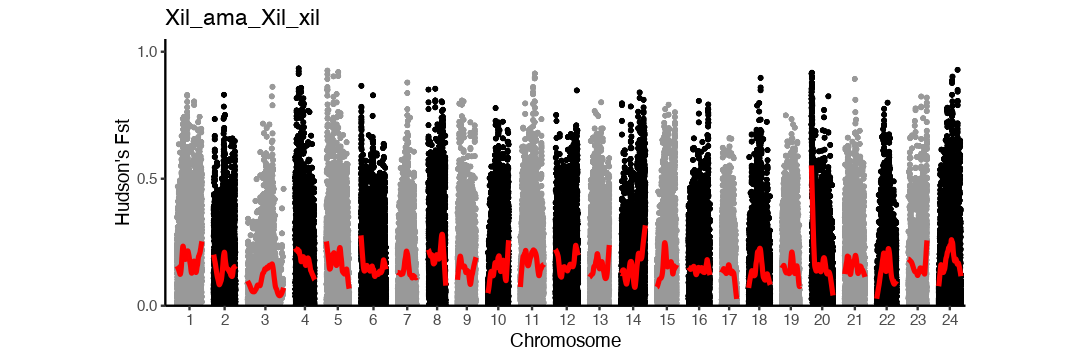

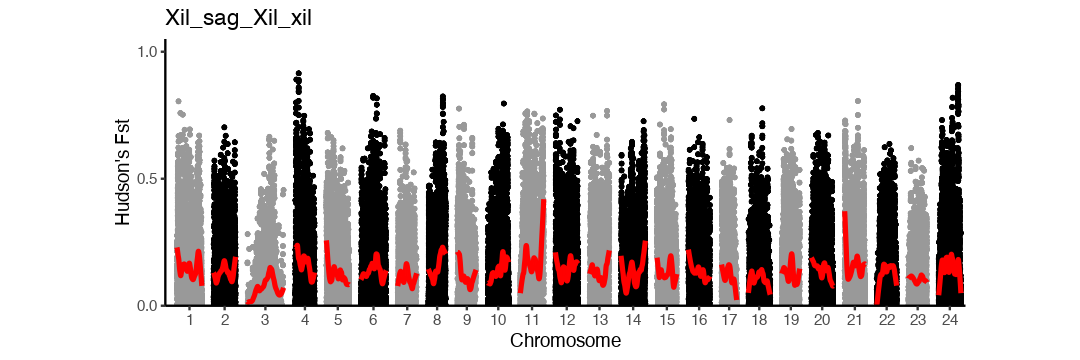

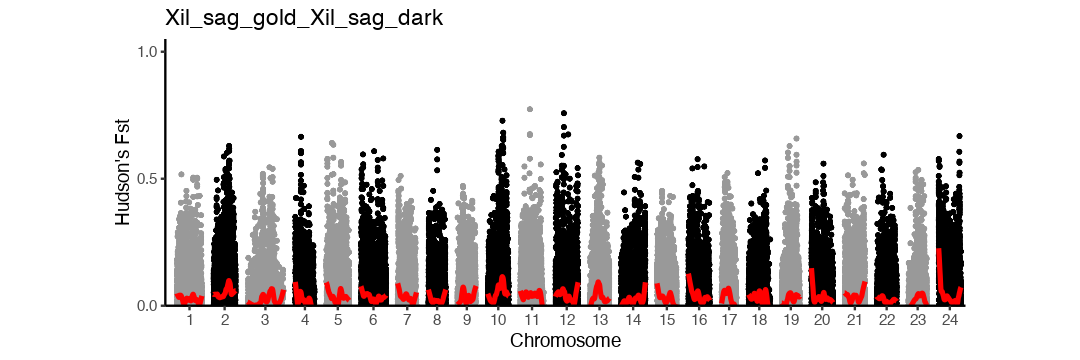

In [27]:
options(repr.plot.width=9, repr.plot.height=3)

fsts<-paste0("genomescans/",list.files("genomescans"))

## these are the ones we plotted already
genome.scan.selection<-c("genomescans/genomescan_Aye_cit_lip_Aye_cit_nlp_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Mas_cit_lip_Mas_cit_nlp_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Nic_lab_lip_Nic_cit_nlp_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Man_lab_lip_Man_cit_nlp_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Xil_ama_Xil_sag_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Xil_vir_Xil_xil_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Apo_ast_Apo_zal_10kb_10kb_masked.bed",
                         "genomescans/genomescan_Apo_fla_Apo_glo_10kb_10kb_masked.bed")

## we remove them from our selection
fsts<-fsts[!fsts %in% genome.scan.selection]

color<-c("grey60","black")
genome.scan.list<-list()

#merge everything into one data frame
for (genome.scan in fsts) {
    genome.scan.tmp <- read.csv(genome.scan,sep="\t")
    genome.scan.tmp$Comparison <- str_sub(genome.scan,24,-22) # Read FST data with an extra column for name
    genome.scan.list[[genome.scan]] <- genome.scan.tmp 
}
  
genome.scans <- data.frame(do.call(rbind, genome.scan.list))
colnames(genome.scans)[colnames(genome.scans) == "chrom"]<-c("CHR")
rownames(genome.scans)<-c()



## create 'continuous genome' including the spacer defined above and add position values from gwas data frame
for (i in 1:24) {
    genome.scans$ContBP[genome.scans$CHR==i] <- Genome2[i]
  }
  genome.scans$BP <- ((genome.scans$start+genome.scans$end)/2) # we use the center of each window
  genome.scans$BP <- (genome.scans$ContBP+genome.scans$BP)/1000000

  genome.scans<-na.omit(genome.scans[,colnames(genome.scans) %in% c("CHR","BP","SNP","fst_hudson","Comparison")])

comparisons<-unique(genome.scans$Comparison)

## add loess smoothening and plot comparisons
for (comparison in comparisons) {
    genome.scans.red <- genome.scans[genome.scans$Comparison==comparison,]
    
    ## calculate loess smoothening — because of the spacers we added before there will be no smoothening 'across' chromosome
    y.loess <- loess(genome.scans.red$fst_hudson~genome.scans.red$BP, span=0.01, degree = 1, family = "gaussian") 
    y.predict <- predict(y.loess, data.frame(x=genome.scans.red$fst_hudson))
    
    ##data.frame with values of loess smoothening
    y.predict.df<-data.frame(CHR=genome.scans.red$CHR,BP=genome.scans.red$BP,y.predict=y.predict) 

    P <-  ggplot(data = genome.scans.red) + 
                        theme_classic() + 
                        theme(aspect.ratio = 1/3) +
                        expand_limits(x = 0, y = 0) + 
                        theme(legend.position="none") +
                        ggrastr::geom_point_rast(aes(x = BP, y = fst_hudson,col=as.factor(CHR)), pch=16, cex=1.5,na.rm=T,raster.width = 7.5,raster.height = 2.5) +
                        scale_x_continuous(name ="Chromosome", breaks = Genome3,labels = 1:24,expand=c(0,0),limits=c(0,limit)) +
                        scale_y_continuous(name="Hudson's Fst",limits = c(0,1.05),breaks=c(0,0.5,1),expand=c(0,0)) +
                        scale_color_manual(values = rep(c("grey60","black"),12)) +
                        ggtitle(label = comparison) +
                        geom_line(aes(x = y.predict.df$BP, y= y.predict.df$y.predict, group=y.predict.df$CHR), col="red",lwd=1.1) 
    
    suppressWarnings(print(P)) 
    }

<H2> 18. Focus on GWAS windows </H2>
 

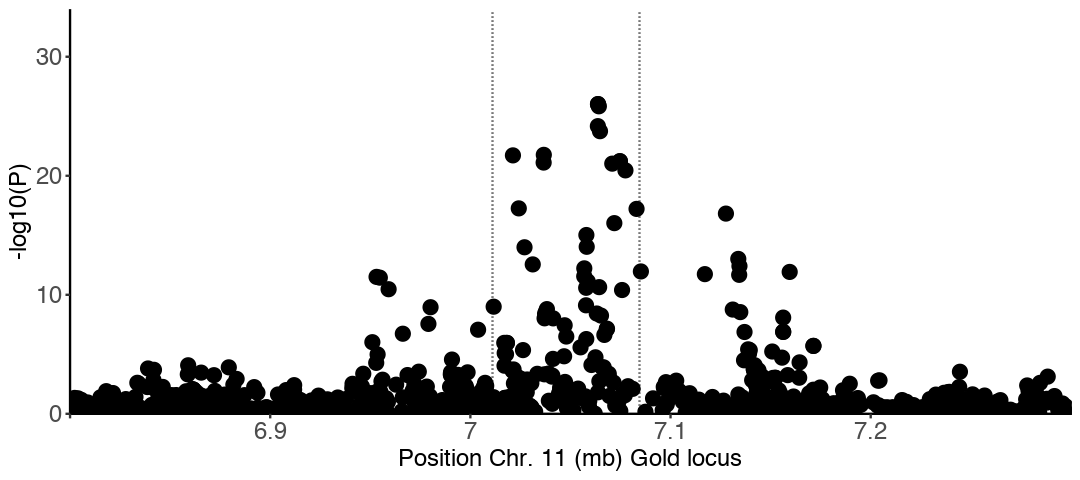

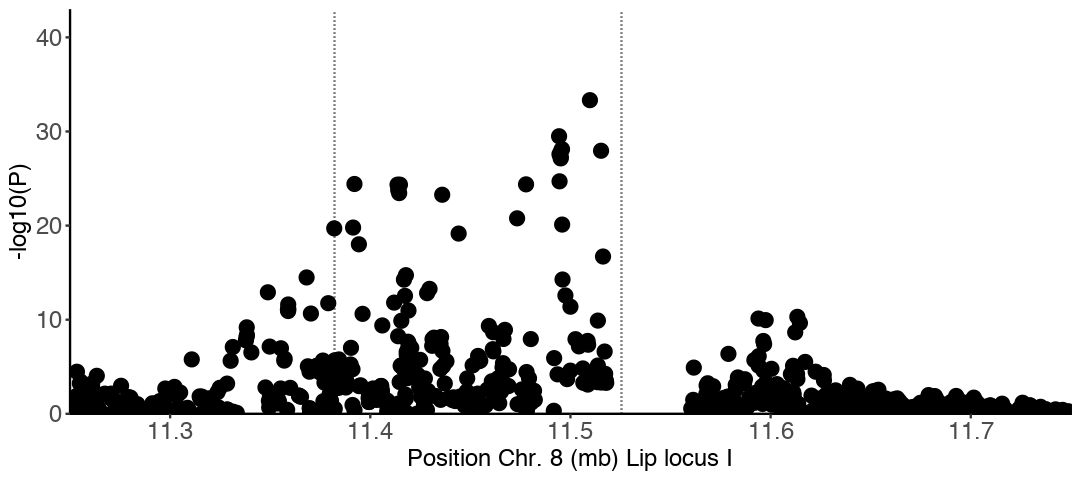

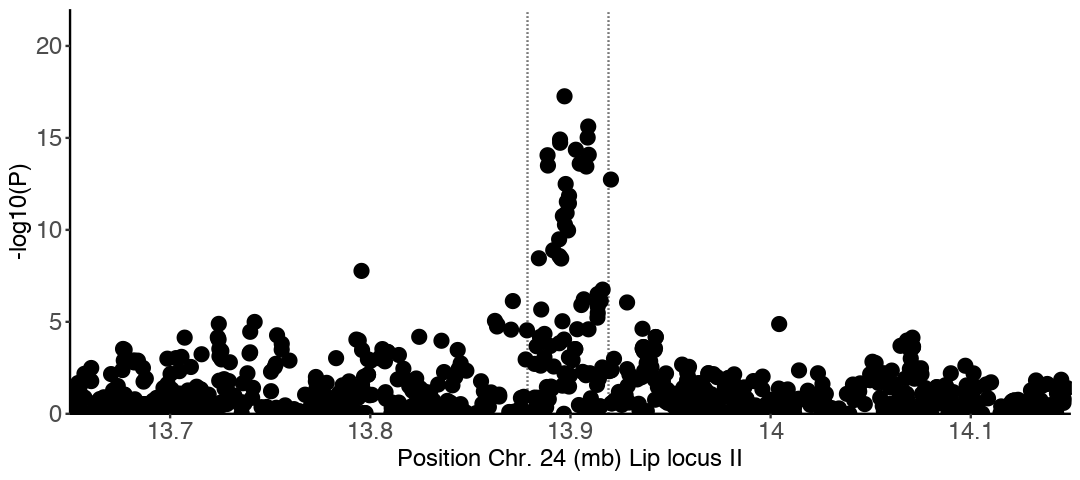

In [28]:
options(repr.plot.width=9, repr.plot.height=4)

centers<-c(7050000,11500000,13900000) ### center of GWAS peaks
ws<-250000 #+/- window 

gwas<-read.csv("gwas/gwas_core_regions_01.csv",header=T,stringsAsFactors = F) ### file with data from window
gwas<-gwas[order(-gwas$LOG10P),]

### filter top 10 variants, a window +/- 10kB will be investigated more in detail below
top<-10
window<-10000
chr<-11
#head(gwas[gwas$CHR==chr,],n=top)
minmax11<-c(min(head(gwas[gwas$CHR==chr,],n=top)[,2]),max(head(gwas[gwas$CHR==chr,],n=top)[,2]))+c(-window,+window)
chr<-8
#head(gwas[gwas$CHR==chr,],n=top)
minmax8<-c(min(head(gwas[gwas$CHR==chr,],n=top)[,2]),max(head(gwas[gwas$CHR==chr,],n=top)[,2]))+c(-window,+window)
chr<-24
#head(gwas[gwas$CHR==chr,],n=top)
minmax24<-c(min(head(gwas[gwas$CHR==chr,],n=top)[,2]),max(head(gwas[gwas$CHR==chr,],n=top)[,2]))+c(-window,+window)


### gold locus +/- 250kb
size<-3
data<-gwas[gwas$GWAS=="gold",]
chr<-data$CHR[1]
ggplot(data = data) + 
  theme_classic() + 
  expand_limits(x = 0, y = 0) + 
  theme(legend.position="none",axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=14,face="bold")) +
  scale_x_continuous(name =paste0("Position Chr. ",chr," (mb) Gold locus"), expand=c(0,0),limits=c(centers[1]-ws,centers[1]+ws),breaks=1000000*c(6.8,6.9,7.0,7.1,7.2),labels =c("",6.9,7.0,7.1,7.2))+
  geom_point(aes(x = POS, y = LOG10P),color="black",cex=3.5) +
  scale_y_continuous(name="-log10(P)", expand=c(0,0),limits=c(0,34))+
  geom_vline(xintercept = minmax11,linetype="dotted")

### lip locus Chr.8 +/- 250kb
data<-gwas[gwas$GWAS=="lip8",]
chr<-data$CHR[1]
ggplot(data = data) + 
  theme_classic() + 
  expand_limits(x = 0, y = 0) + 
  theme(legend.position="none",axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=14,face="bold")) +
  scale_x_continuous(name =paste0("Position Chr. ",chr," (mb) Lip locus I"), expand=c(0,0),limits=c(centers[2]-ws,centers[2]+ws),breaks=1000000*c(11.3,11.4,11.5,11.6,11.7),labels =c(11.3,11.4,11.5,11.6,11.7))+
  geom_point(aes(x = POS, y = LOG10P),color="black",cex=3.5) +
  scale_y_continuous(name="-log10(P)", expand=c(0,0),limits=c(0,43)) +
  geom_vline(xintercept = minmax8,linetype="dotted")

### lip locus Chr.24 +/- 250kb  
data<-gwas[gwas$GWAS=="lip24",]
chr<-data$CHR[1]
ggplot(data = data) + 
  theme_classic() + 
  expand_limits(x = 0, y = 0) + 
  theme(legend.position="none",axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=14,face="bold")) +
  scale_x_continuous(name =paste0("Position Chr. ",chr," (mb) Lip locus II"), expand=c(0,0),limits=c(centers[3]-ws,centers[3]+ws),breaks=1000000*c(13.7,13.8,13.9,14.0,14.1),labels =c(13.7,13.8,13.9,14.0,14.1))+
  geom_point(aes(x = POS, y = LOG10P),color="black",cex=3.5) +
  scale_y_continuous(name="-log10(P)", expand=c(0,0),limits=c(0,22))+
  geom_vline(xintercept = minmax24,linetype="dotted")

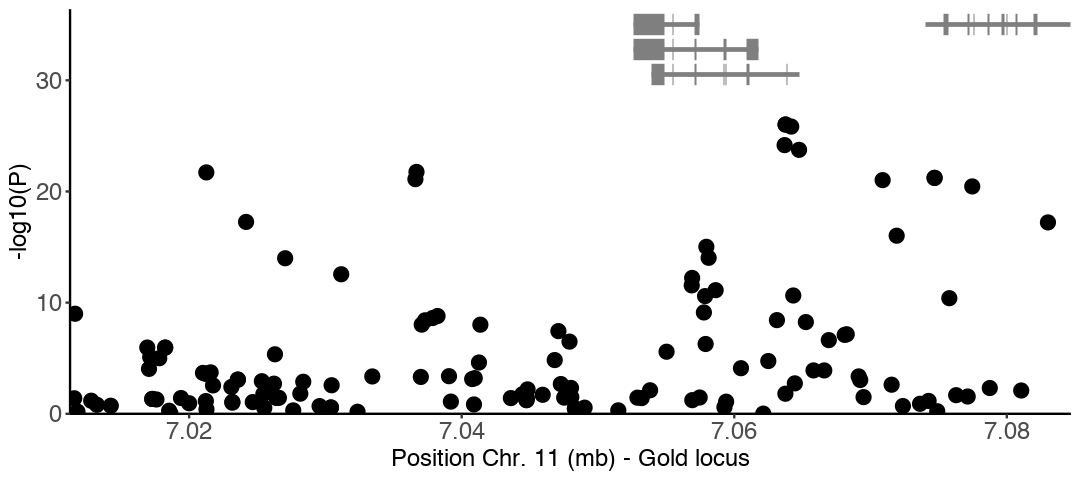

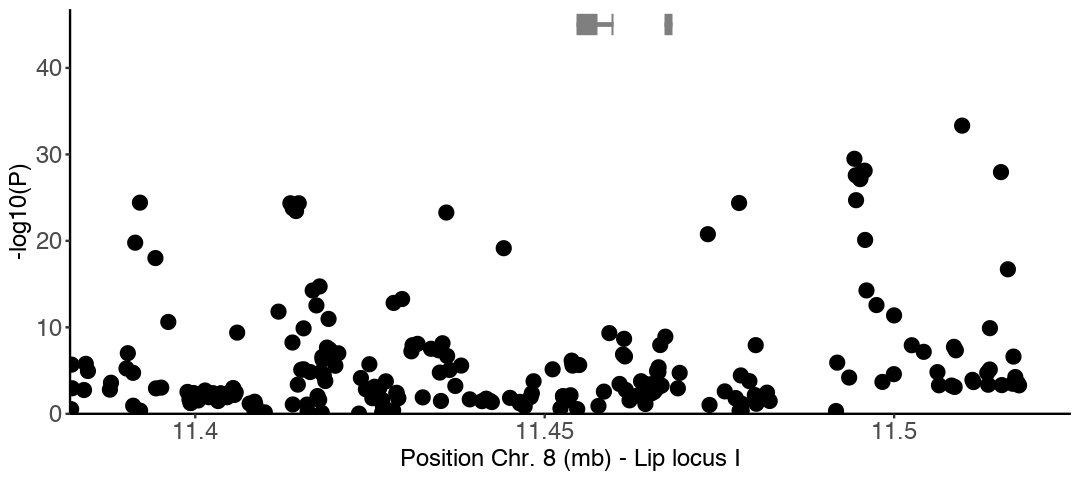

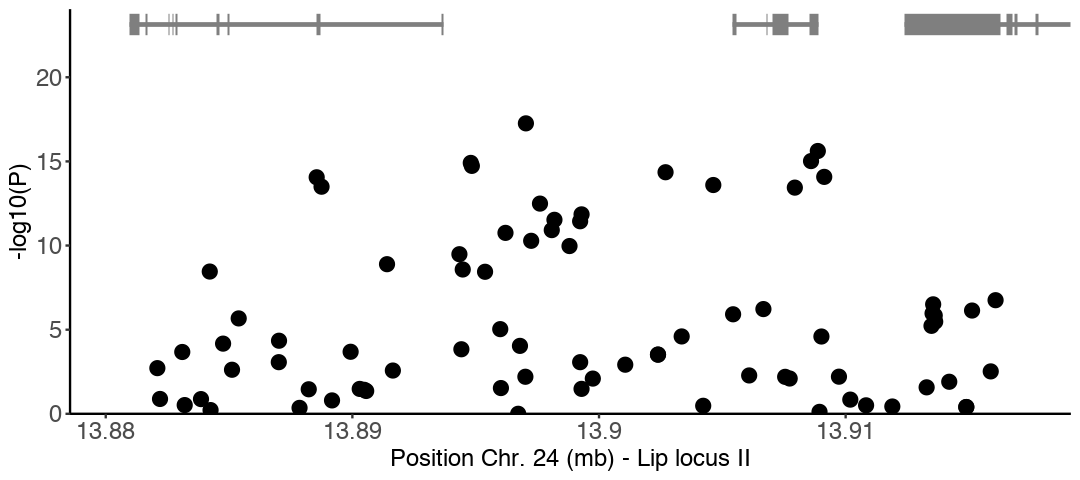

In [29]:
options(repr.plot.width=9, repr.plot.height=4)

gwas<-read.csv("gwas/gwas_core_regions_02.csv",header=T,stringsAsFactors = F) ### file with data from window
cds<-read.csv("gwas/annotation_gwas_interval_cds.csv",header=T,stringsAsFactors = F) # read annotations for exon position
transcripts<-read.csv("gwas/annotation_gwas_interval_transcripts.csv",header=T,stringsAsFactors = F) # read annotations for transcript position

spacer<-1.3
size<-3
data<-gwas[gwas$GWAS=="gold",]
chr<-data$CHR[1]
max1<-28
ggplot(data = data) + 
  theme_classic() + 
  expand_limits(x = 0, y = 0) + 
  theme(legend.position="none",axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=14,face="bold")) +
  scale_x_continuous(name =paste0("Position Chr. ",chr," (mb) - Gold locus"), expand=c(0,0),limits=minmax11,breaks=1000000*c(7.02,7.04,7.06,7.08),labels =c(7.02,7.04,7.06,7.08))+
  geom_point(aes(x = POS, y = LOG10P),color="black",cex=3.5) +
  scale_y_continuous(name="-log10(P)", expand=c(0,0),limits=c(0,spacer*max1))+
  geom_segment(data=cds[cds$Chr==chr & cds$Isoform==1,], mapping=aes(x=Start, y=(spacer-0.05)*max1, xend=End, yend=(spacer-0.05)*max1), size=size*1.5, color="grey50")+ 
  geom_segment(data=cds[cds$Chr==chr & cds$Isoform==3,], mapping=aes(x=Start, y=(spacer-0.13)*max1, xend=End, yend=(spacer-0.13)*max1), size=size*1.5, color="grey50")+ 
  geom_segment(data=cds[cds$Chr==chr & cds$Isoform==2,], mapping=aes(x=Start, y=(spacer-0.21)*max1, xend=End, yend=(spacer-0.21)*max1), size=size*1.5, color="grey50")+ 
  geom_segment(data=transcripts[transcripts$Chr==chr & transcripts$Isoform==1,], mapping=aes(x=Transcript_Start, y=(spacer-0.05)*max1, xend=Transcript_End, yend=(spacer-0.05)*max1), size=size/3, color="grey50")+ 
  geom_segment(data=transcripts[transcripts$Chr==chr & transcripts$Isoform==3,], mapping=aes(x=Transcript_Start, y=(spacer-0.13)*max1, xend=Transcript_End, yend=(spacer-0.13)*max1), size=size/3, color="grey50")+ 
  geom_segment(data=transcripts[transcripts$Chr==chr & transcripts$Isoform==2,], mapping=aes(x=Transcript_Start, y=(spacer-0.21)*max1, xend=Transcript_End, yend=(spacer-0.21)*max1), size=size/3, color="grey50")

data<-gwas[gwas$GWAS=="lip8",]
chr<-data$CHR[1]
max2<-36
ggplot(data = data) + 
  theme_classic() + 
  expand_limits(x = 0, y = 0) + 
  theme(legend.position="none",axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=14,face="bold")) +
  scale_x_continuous(name =paste0("Position Chr. ",chr," (mb) - Lip locus I"), expand=c(0,0),limits=minmax8,breaks=1000000*c(11.40,11.45,11.50),labels =c(11.40,11.45,11.50))+
  geom_point(aes(x = POS, y = LOG10P),color="black",cex=3.5) +
  scale_y_continuous(name="-log10(P)", expand=c(0,0),limits=c(0,spacer*max2))+
  geom_segment(data=cds[cds$Chr==chr & cds$Isoform==1,], mapping=aes(x=Start, y=(spacer-0.05)*max2, xend=End, yend=(spacer-0.05)*max2), size=size*1.5, color="grey50")+ 
  geom_segment(data=transcripts[transcripts$Chr==chr & transcripts$Isoform==1,], mapping=aes(x=Transcript_Start, y=(spacer-0.05)*max2, xend=Transcript_End, yend=(spacer-0.05)*max2), size=size/3, color="grey50")

data<-gwas[gwas$GWAS=="lip24",]
chr<-data$CHR[1]
max<-18.5
chr<-24
ggplot(data = data) + 
  theme_classic() + 
  expand_limits(x = 0, y = 0) + 
  theme(legend.position="none",axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=14,face="bold")) +
  scale_x_continuous(name =paste0("Position Chr. ",chr," (mb) - Lip locus II"), expand=c(0,0),limits=minmax24,breaks=1000000*c(13.88,13.89,13.90,13.91),labels =c(13.88,13.89,13.90,13.91))+
  geom_point(aes(x = POS, y = LOG10P),color="black",cex=3.5) +
  scale_y_continuous(name="-log10(P)", expand=c(0,0),limits=c(0,spacer*max))+
  geom_segment(data=cds[cds$Chr==chr & cds$Isoform==1,], mapping=aes(x=Start, y=(spacer-0.05)*max, xend=End, yend=(spacer-0.05)*max), size=size*1.5, color="grey50")+ 
  geom_segment(data=transcripts[transcripts$Chr==chr & transcripts$Isoform==1,], mapping=aes(x=Transcript_Start, y=(spacer-0.05)*max, xend=Transcript_End, yend=(spacer-0.05)*max), size=size/3, color="grey50")

<H2> 19. Calculate intersect between Diploshic windows </H2>
 

character(0)


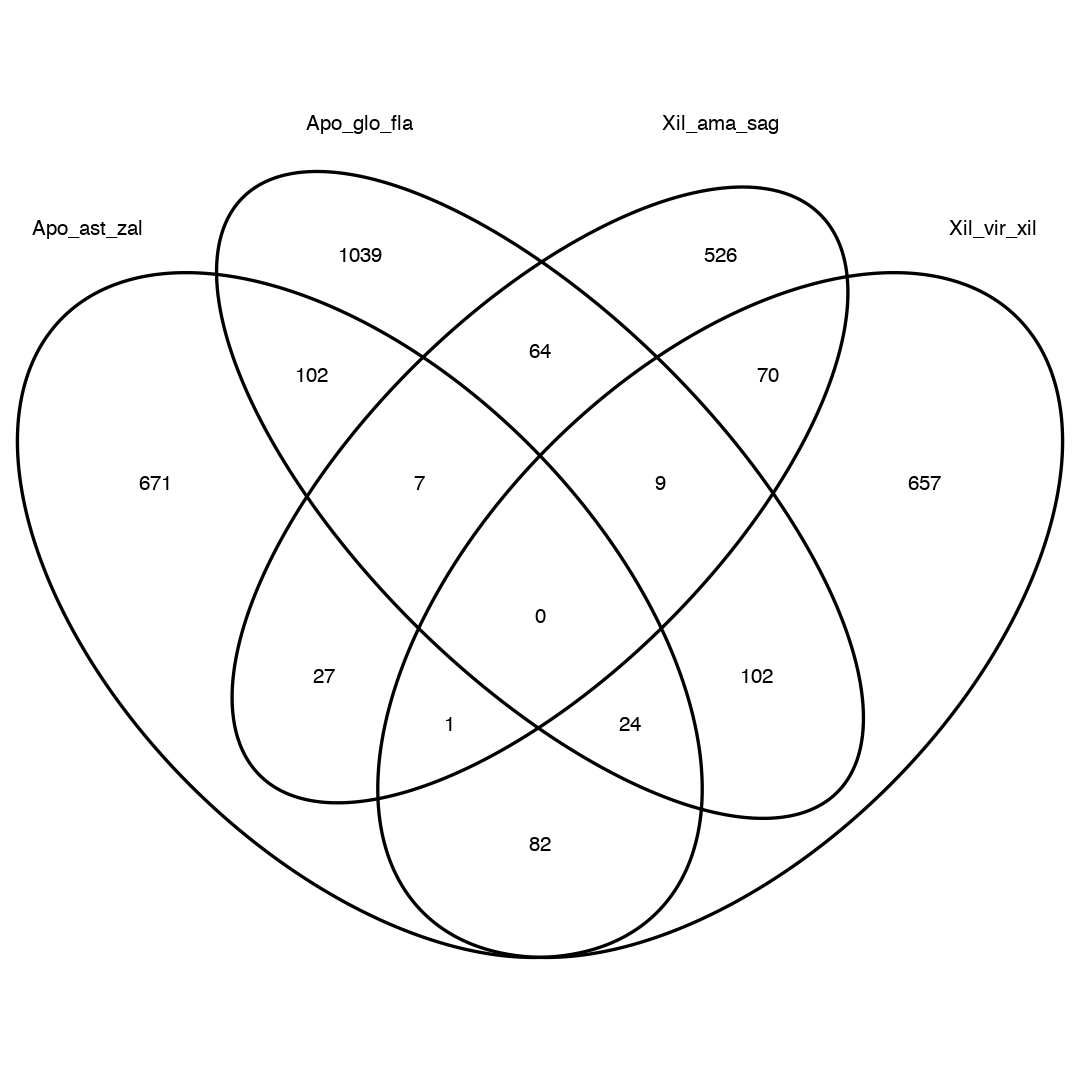

In [30]:
options(repr.plot.width=9, repr.plot.height=9)

threshold<-.99

set1 <- diplo$id[diplo$pop=="Apo_ast_Apo_zal.50kb" & diplo$prob.divergent>threshold]
set2 <- diplo$id[diplo$pop=="Apo_glo_Apo_fla.50kb" & diplo$prob.divergent>threshold]
set3 <- diplo$id[diplo$pop=="Xil_ama_Xil_sag.50kb" & diplo$prob.divergent>threshold]
set4 <- diplo$id[diplo$pop=="Xil_vir_Xil_xil.50kb" & diplo$prob.divergent>threshold]

# Chart
P1<-venn.diagram(filename = NULL,
  x = list(set1, set4, set2, set3),
  category.names = c("Apo_ast_zal" , "Xil_vir_xil" , "Apo_glo_fla" , "Xil_ama_sag"))

grid.draw(P1)

print(intersect(set1,intersect(set2,intersect(set3,set4)))) ## there are no shared windows

[1] "8:10900000-11950000" "8:10950000-12000000" "8:11000000-12050000"


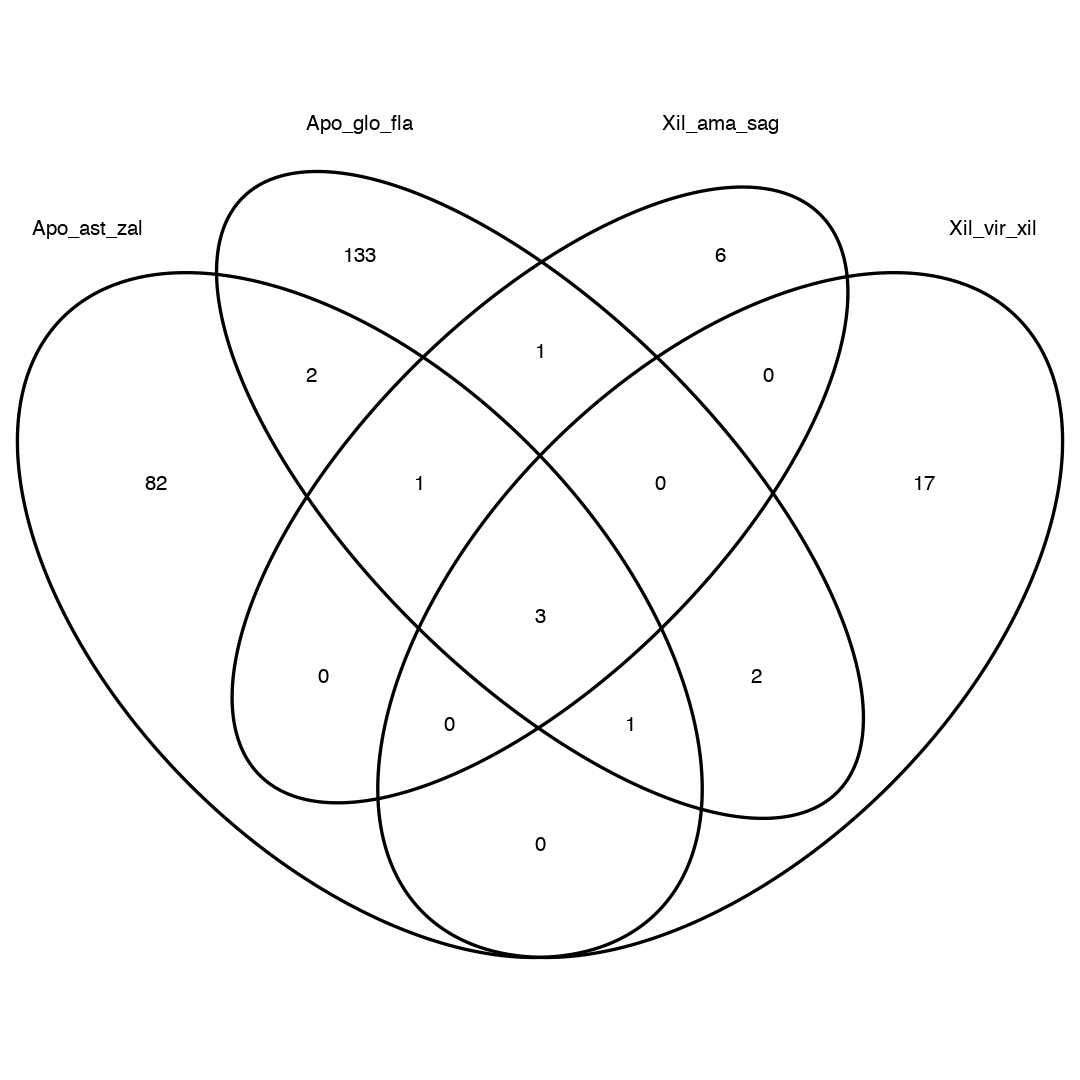

In [31]:
options(repr.plot.width=9, repr.plot.height=9)

threshold<-.99

set1 <- diplo$id[diplo$pop=="Man_cit_Man_lab.50kb" & diplo$prob.divergent>threshold]
set2 <- diplo$id[diplo$pop=="Nic_cit_Nic_lab.50kb" & diplo$prob.divergent>threshold]
set3 <- diplo$id[diplo$pop=="Aye_cit_nlp_Aye_cit_lip.50kb" & diplo$prob.divergent>threshold]
set4 <- diplo$id[diplo$pop=="Mas_cit_nlp_Mas_cit_lip.50kb" & diplo$prob.divergent>threshold]

# Chart
P2<-venn.diagram(filename = NULL,
  x = list(set1, set4, set2, set3),
  category.names = c("Apo_ast_zal" , "Xil_vir_xil" , "Apo_glo_fla" , "Xil_ama_sag"))


grid.draw(P2)


print(intersect(set1,intersect(set2,intersect(set3,set4)))) ## all 3 windows are at the lip locus!

<H2> 20. Session Information </H2>
 

In [32]:
sessionInfo()

R version 3.5.3 (2019-03-11)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS  10.15.4

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] qtl_1.46-2           scatterplot3d_0.3-41 VennDiagram_1.6.20  
 [4] futile.logger_1.4.3  reshape_0.8.8        devtools_2.3.0      
 [7] usethis_1.6.0        stringr_1.4.0        cowplot_1.0.0       
[10] ggplot2_3.3.0       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4.6         prettyunits_1.1.1    ps_1.3.2            
 [4] assertthat_0.2.1     rprojroot_1.3-2      digest_0.6.25       
 [7] IRdisplay_0.7.0      R6_2.4.1             plyr_1.8.6          
[10] repr_1.1.0           futile.options_1.0.1 backports_1